###### --------Heart Stroke Prediction--------

### Library importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and Reviewing the Data

In [2]:
df=pd.read_csv(r'C:\Users\KIIT\OneDrive\Desktop\Project\8th_sem\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Definition of features

###### age: age in years
###### sex: sex
- 1 = male
- 0 = female

###### cp: chest pain type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

###### trestbps: resting blood pressure (in mm Hg on admission to the hospital)
###### chol: serum cholestoral in mg/dl
###### fbs: (fasting blood sugar > 120 mg/dl)
- 1 = true;
- 0 = false

###### restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

###### thalach: maximum heart rate achieved
###### exang: exercise induced angina
- 1 = yes
- 0 = no

###### oldpeak = ST depression induced by exercise relative to rest
###### slope: the slope of the peak exercise ST segment
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping

###### ca: number of major vessels (0-3) colored by flourosopy
###### thal:
- 0 = error (in the original dataset 0 maps to NaN's)
- 1 = fixed defect
- 2 = normal
- 3 = reversable defect

###### target (the lable):
- 0 = no disease,
- 1 = disease
 - ###### Diagnosis of heart disease (angiographic disease status)
  - Value 0: < 50% diameter narrowing
  - Value 1: > 50% diameter narrowing

In [3]:
df.drop(columns='id',inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
col=df.columns.tolist()

# Check for null values

In [71]:
print('Number of missing value')
for col_name in col:
    print('{} :- {}'.format(col_name,df[col_name].isnull().sum()))

Number of missing value
gender :- 0
age :- 0
hypertension :- 0
heart_disease :- 0
ever_married :- 0
work_type :- 0
Residence_type :- 0
avg_glucose_level :- 0
bmi :- 201
smoking_status :- 0
stroke :- 0


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


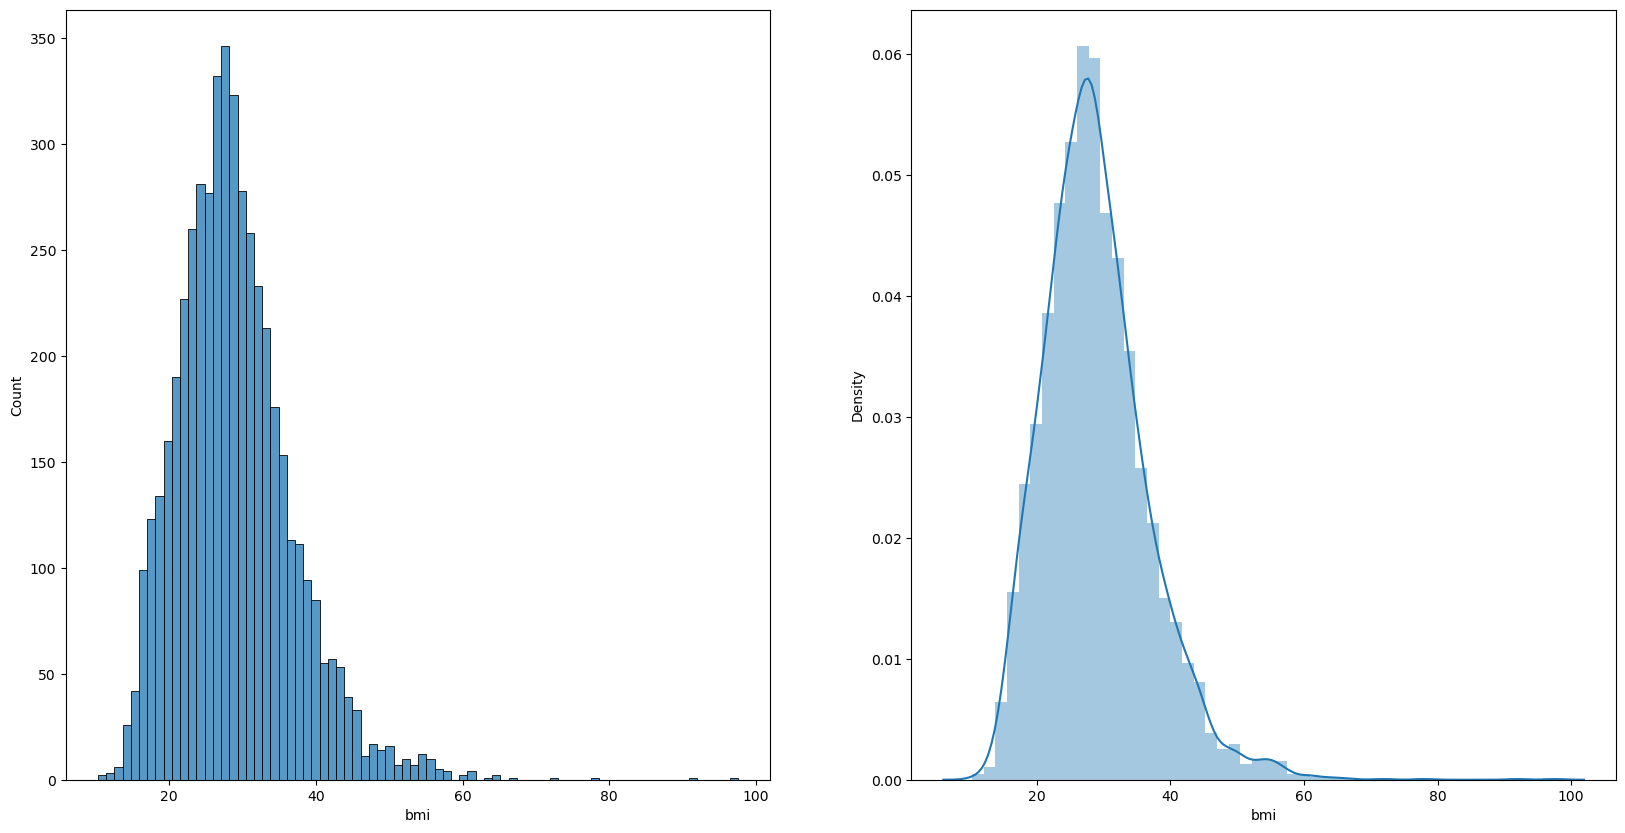

In [10]:
# plt.figure(figsize=(20,15))
fig,ax=plt.subplots(1,2,figsize=(20,10))

sns.histplot(df['bmi'],ax=ax[0])
sns.distplot(df['bmi'],ax=ax[1])
plt.show()


In [11]:
print(f"The missing data percantage is  : {round((df['bmi'].isnull().sum()/df['bmi'].shape[0]),2)*100}%")

The missing data percantage is  : 4.0%


In [4]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


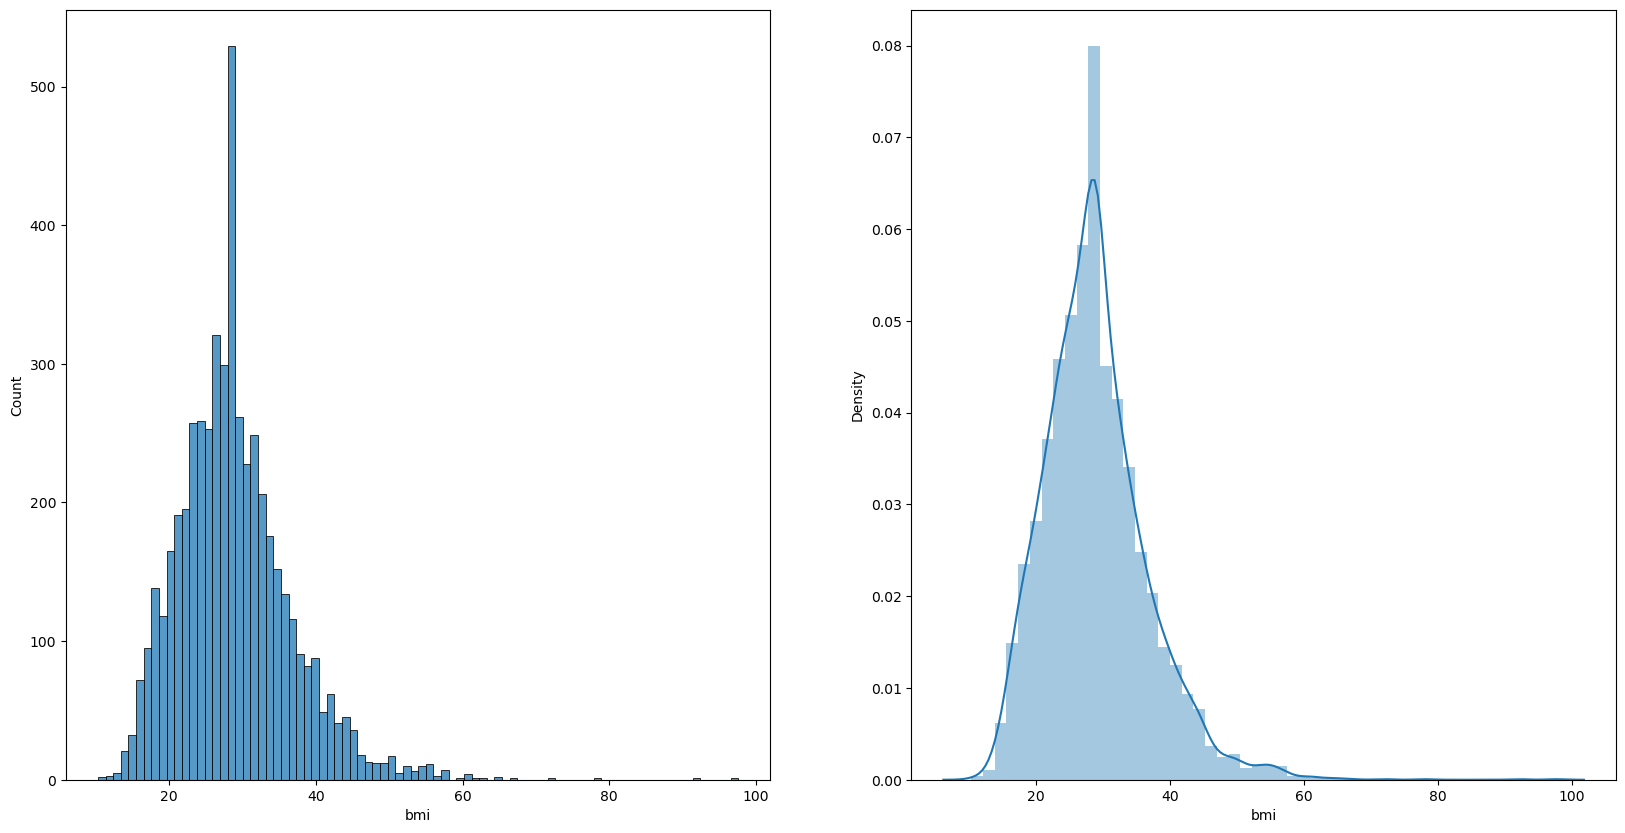

In [13]:
fig,ax=plt.subplots(1,2,figsize=(20,10))

sns.histplot(df['bmi'],ax=ax[0])
sns.distplot(df['bmi'],ax=ax[1])
plt.show()

In [14]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [15]:
sns.set_style('darkgrid')

# Check for duplicate values

In [16]:
for col_name in col:
    print('{} :- {}'.format(col_name,df[col_name].duplicated().sum()))

gender :- 5107
age :- 5006
hypertension :- 5108
heart_disease :- 5108
ever_married :- 5108
work_type :- 5105
Residence_type :- 5108
avg_glucose_level :- 1131
bmi :- 4691
smoking_status :- 5106
stroke :- 5108


# Check for Unique values

In [17]:
for col_name in col:
    print('{} :- {}'.format(col_name,df[col_name].unique()))
    print('---------------------------')

gender :- ['Male' 'Female' 'Other']
---------------------------
age :- [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-0

# Exploratory Data Analysis

In [18]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [19]:
print(f"Total  number of 'Unknow' value in  smoking_status column  : {round((df[df['smoking_status']=='Unknown'].shape[0]/df.shape[0]),2)*100}%")
print(f"Total  number of 'Unknow' value in  smoking_status column  : {round((df[df['smoking_status']=='never smoked'].shape[0]/df.shape[0]),2)*100}%")
print(f"Total  number of 'Unknow' value in  smoking_status column  : {round((df[df['smoking_status']=='formerly smoked'].shape[0]/df.shape[0]),2)*100}%")
print(f"Total  number of 'Unknow' value in  smoking_status column  : {round((df[df['smoking_status']=='smokes'].shape[0]/df.shape[0]),2)*100}%")

Total  number of 'Unknow' value in  smoking_status column  : 30.0%
Total  number of 'Unknow' value in  smoking_status column  : 37.0%
Total  number of 'Unknow' value in  smoking_status column  : 17.0%
Total  number of 'Unknow' value in  smoking_status column  : 15.0%


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

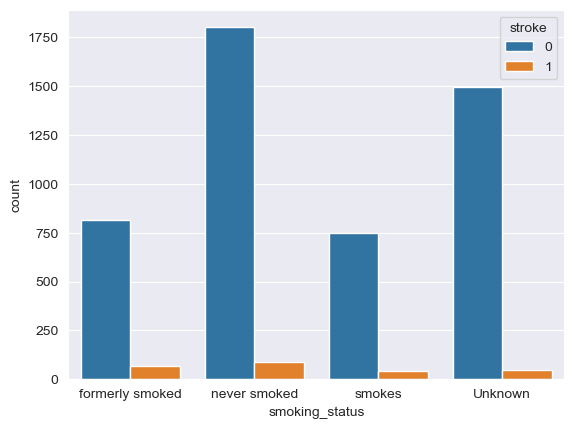

In [20]:
sns.countplot(df['smoking_status'],hue=df['stroke'])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

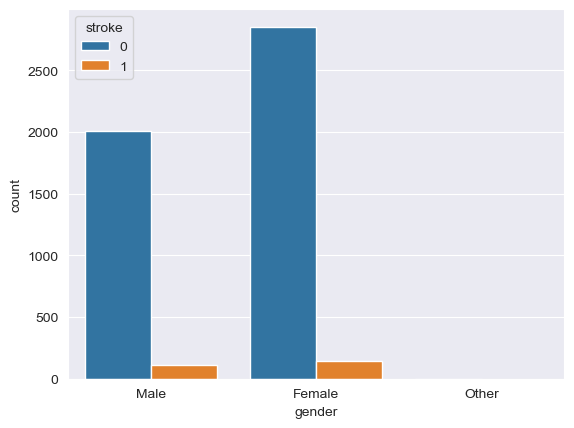

In [74]:
sns.countplot(df['gender'],hue=df['stroke'])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

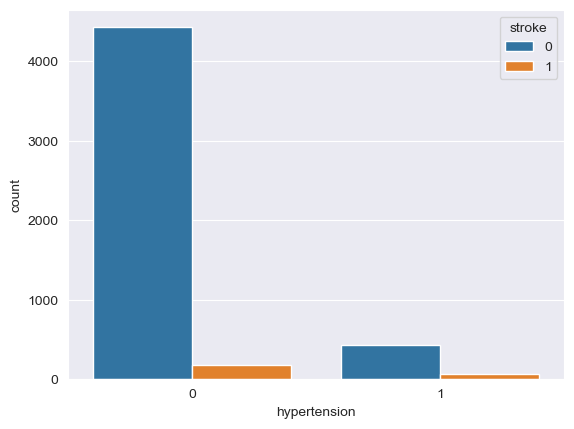

In [75]:
sns.countplot(df['hypertension'],hue=df['stroke'])

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

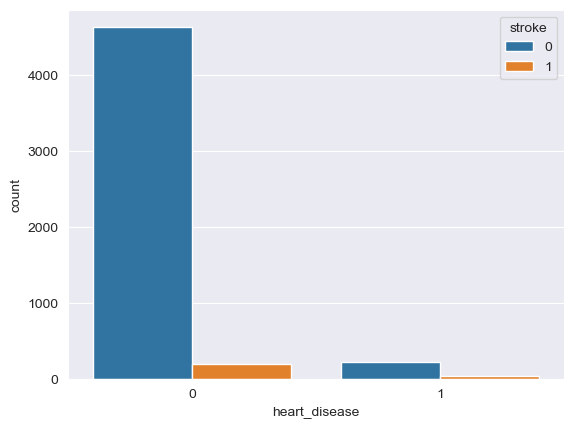

In [78]:
sns.countplot(df['heart_disease'],hue=df['stroke'])

In [24]:
print(f"Those who job is Private {round(((df[df['stroke']==1]['work_type']=='Private').sum()/df[df['work_type']=='Private'].shape[0] )*100,2)}% people had stroke ")
print(f"Those who's job is Self-employed {round(((df[df['stroke']==1]['work_type']=='Self-employed').sum()/df[df['work_type']=='Self-employed'].shape[0] )*100,2)}% people had stroke ")
print(f"Those who are children {round(((df[df['stroke']==1]['work_type']=='children').sum()/df[df['work_type']=='children'].shape[0] )*100,2)}% people had stroke ")
print(f"Those who's job is Govt_job {round(((df[df['stroke']==1]['work_type']=='Govt_job').sum()/df[df['work_type']=='Govt_job'].shape[0] )*100,2)}% people had stroke ")
print(f"Those who  Never_worked {round(((df[df['stroke']==1]['work_type']=='Never_worked').sum()/df[df['work_type']=='Never_worked'].shape[0] )*100,2)}% people had stroke ")


Those who job is Private 5.09% people had stroke 
Those who's job is Self-employed 7.94% people had stroke 
Those who are children 0.29% people had stroke 
Those who's job is Govt_job 5.02% people had stroke 
Those who  Never_worked 0.0% people had stroke 


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

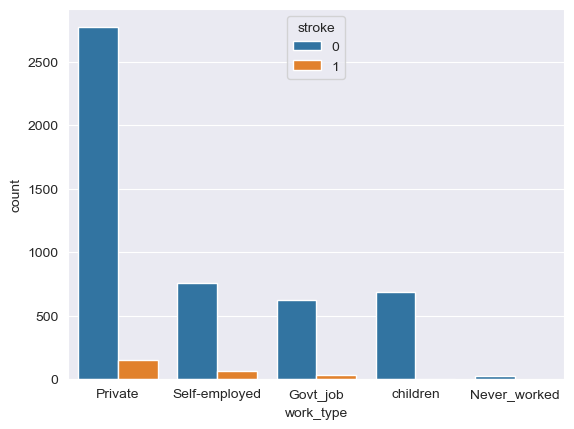

In [25]:
sns.countplot(df['work_type'],hue=df['stroke'])

In [26]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [28]:
print(f"Those who live in  {round(((df[df['stroke']==1]['Residence_type']=='Urban').sum()/df[df['Residence_type']=='Urban'].shape[0] )*100,2)}% people had stroke ")
print(f"Those who Rural in {round(((df[df['stroke']==1]['Residence_type']=='Rural').sum()/df[df['Residence_type']=='Rural'].shape[0] )*100,2)}% people had stroke ")


Those who live in  5.2% people had stroke 
Those who Rural in 4.53% people had stroke 


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

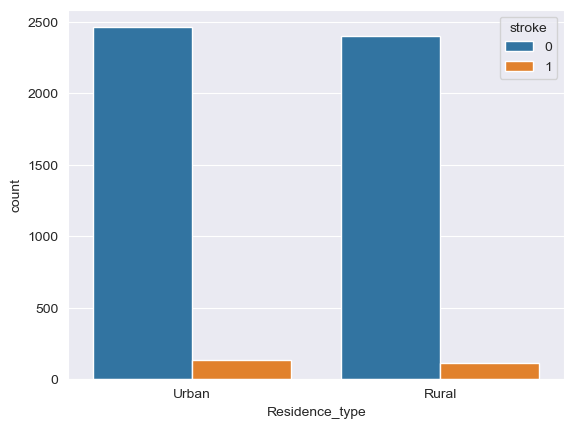

In [27]:
sns.countplot(df['Residence_type'],hue=df['stroke'])

In [29]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [30]:
print(f"Those who is  married {round(((df[df['stroke']==1]['ever_married']=='Yes').sum()/df[df['ever_married']=='Yes'].shape[0] )*100,2)}% people had stroke ")
print(f"Those who is not married {round(((df[df['stroke']==1]['ever_married']=='No').sum()/df[df['ever_married']=='No'].shape[0] )*100,2)}% people had stroke ")


Those who is  married 6.56% people had stroke 
Those who is not married 1.65% people had stroke 


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

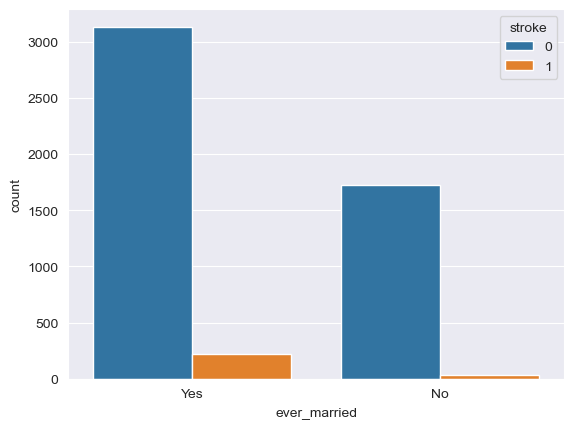

In [31]:
sns.countplot(df['ever_married'],hue=df['stroke'])

###### By ovserving above charts we can conclude that there is not pattern

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-p

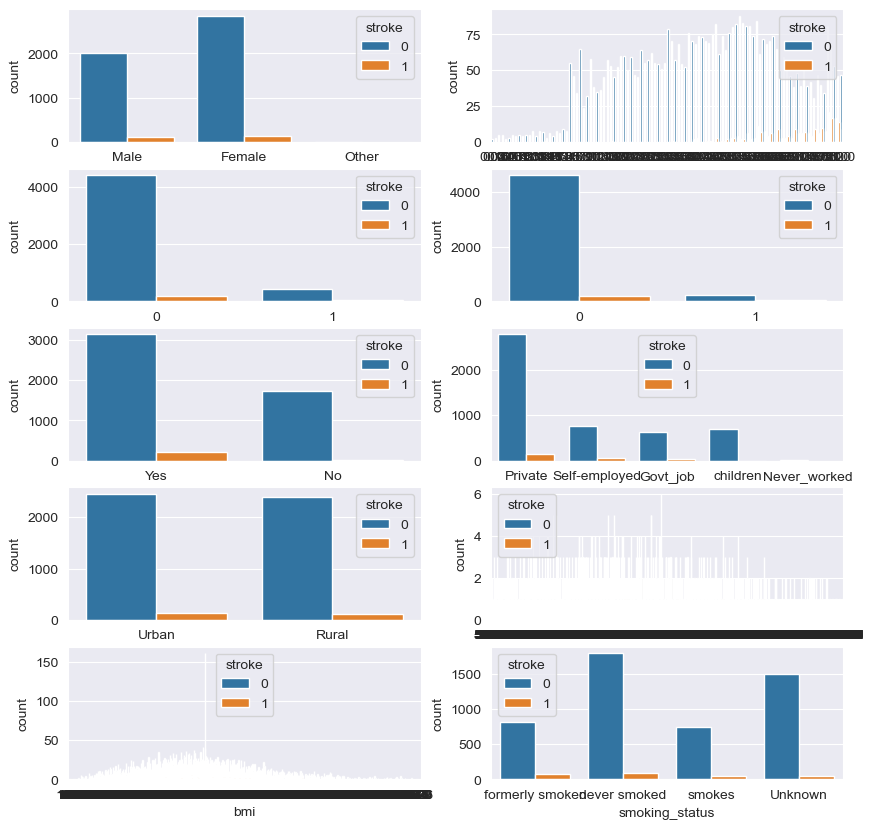

In [143]:
fig,ax= plt.subplots(5,2, figsize=(10,10))
sns.countplot(df['gender'],hue=df['stroke'],ax=ax[0,0])
sns.countplot(df['age'],hue=df['stroke'],ax=ax[0,1])
sns.countplot(df['hypertension'],hue=df['stroke'],ax=ax[1,0])
sns.countplot(df['heart_disease'],hue=df['stroke'],ax=ax[1,1])
sns.countplot(df['ever_married'],hue=df['stroke'],ax=ax[2,0])
sns.countplot(df['work_type'],hue=df['stroke'],ax=ax[2,1])
sns.countplot(df['Residence_type'],hue=df['stroke'],ax=ax[3,0])
sns.countplot(df['avg_glucose_level'],hue=df['stroke'],ax=ax[3,1])
sns.countplot(df['bmi'],hue=df['stroke'],ax=ax[4,0])
sns.countplot(df['smoking_status'],hue=df['stroke'],ax=ax[4,1])
plt.show()

# Outlier Identifying

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

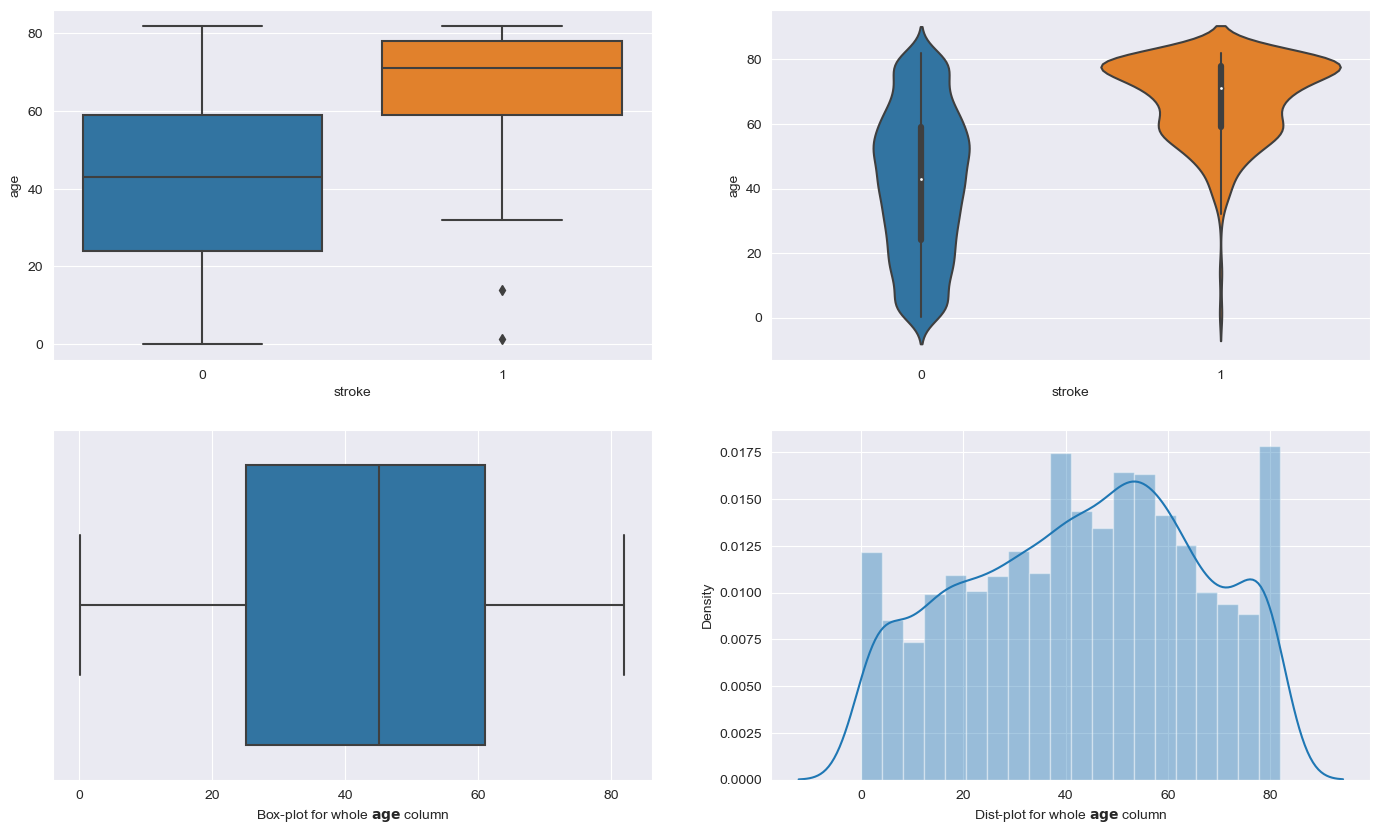

In [35]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('stroke','age',data=df,ax=ax[0,0])
sns.violinplot('stroke','age',data=df,ax=ax[0,1])
sns.boxplot('age',data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Box-plot for whole $\mathbf{age}$ column')
sns.distplot(df['age'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{age}$ column')

plt.show()


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

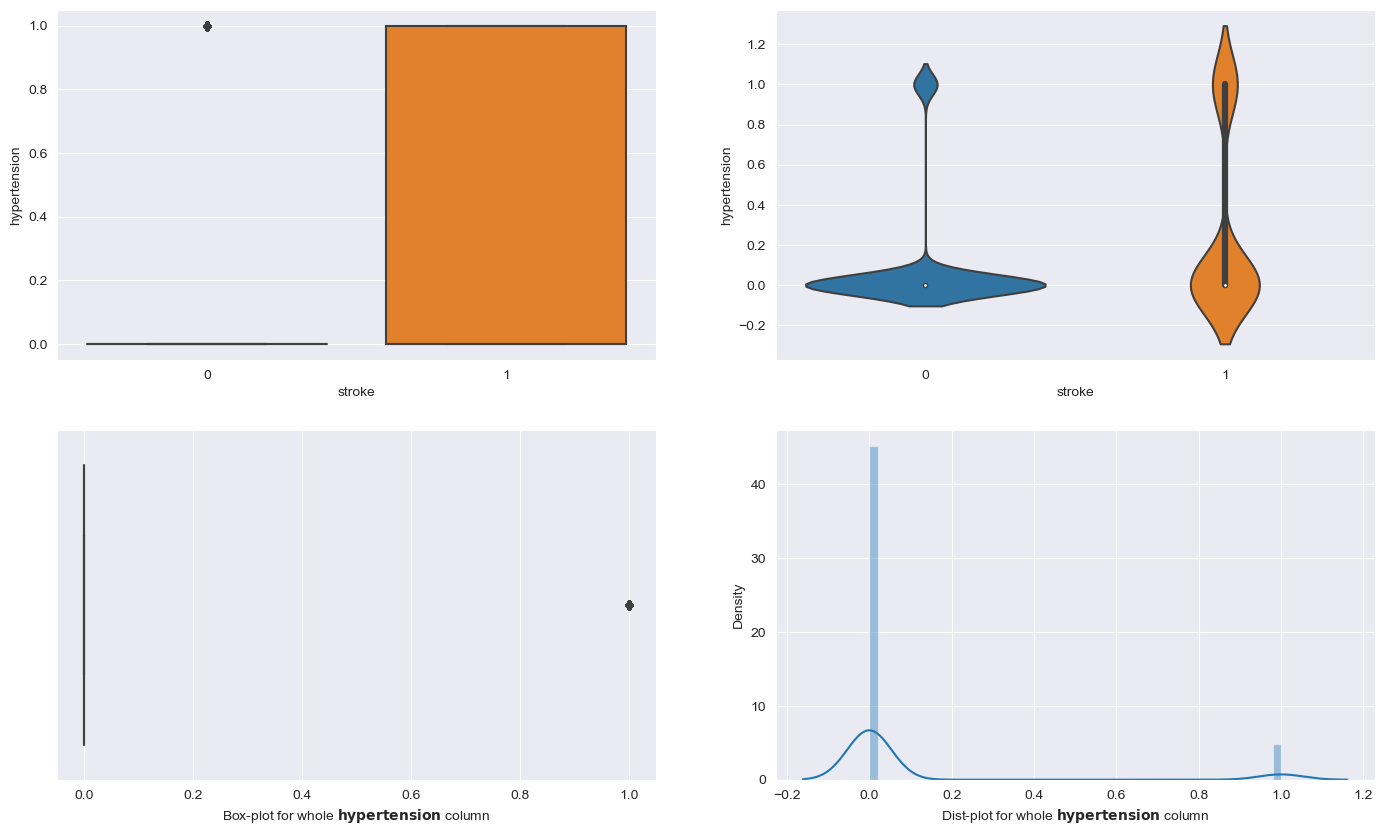

In [36]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('stroke','hypertension',data=df,ax=ax[0,0])
sns.violinplot('stroke','hypertension',data=df,ax=ax[0,1])
sns.boxplot('hypertension',data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Box-plot for whole $\mathbf{hypertension}$ column')
sns.distplot(df['hypertension'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{hypertension}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

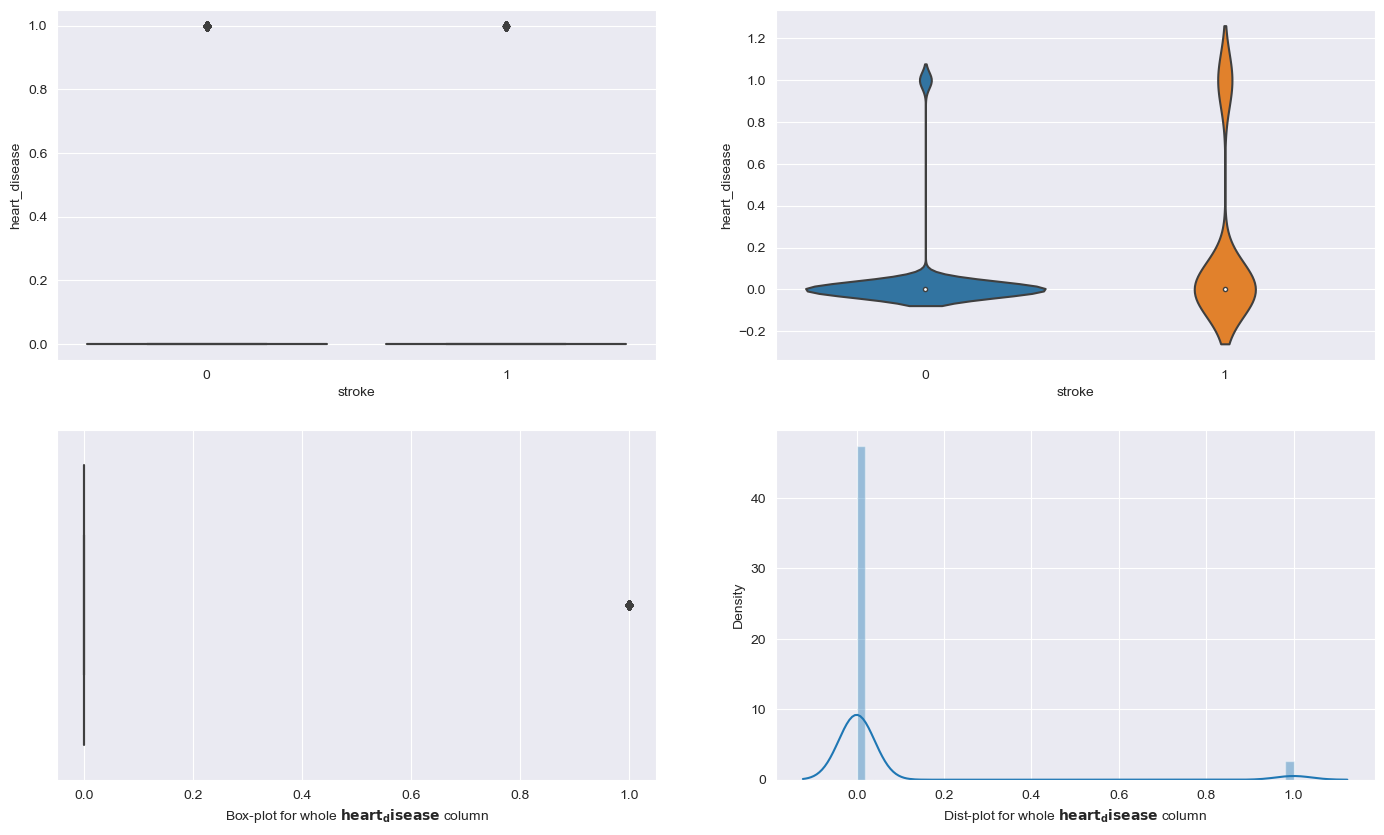

In [37]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('stroke','heart_disease',data=df,ax=ax[0,0])
sns.violinplot('stroke','heart_disease',data=df,ax=ax[0,1])
sns.boxplot('heart_disease',data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Box-plot for whole $\mathbf{heart_disease}$ column')
sns.distplot(df['heart_disease'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{heart_disease}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

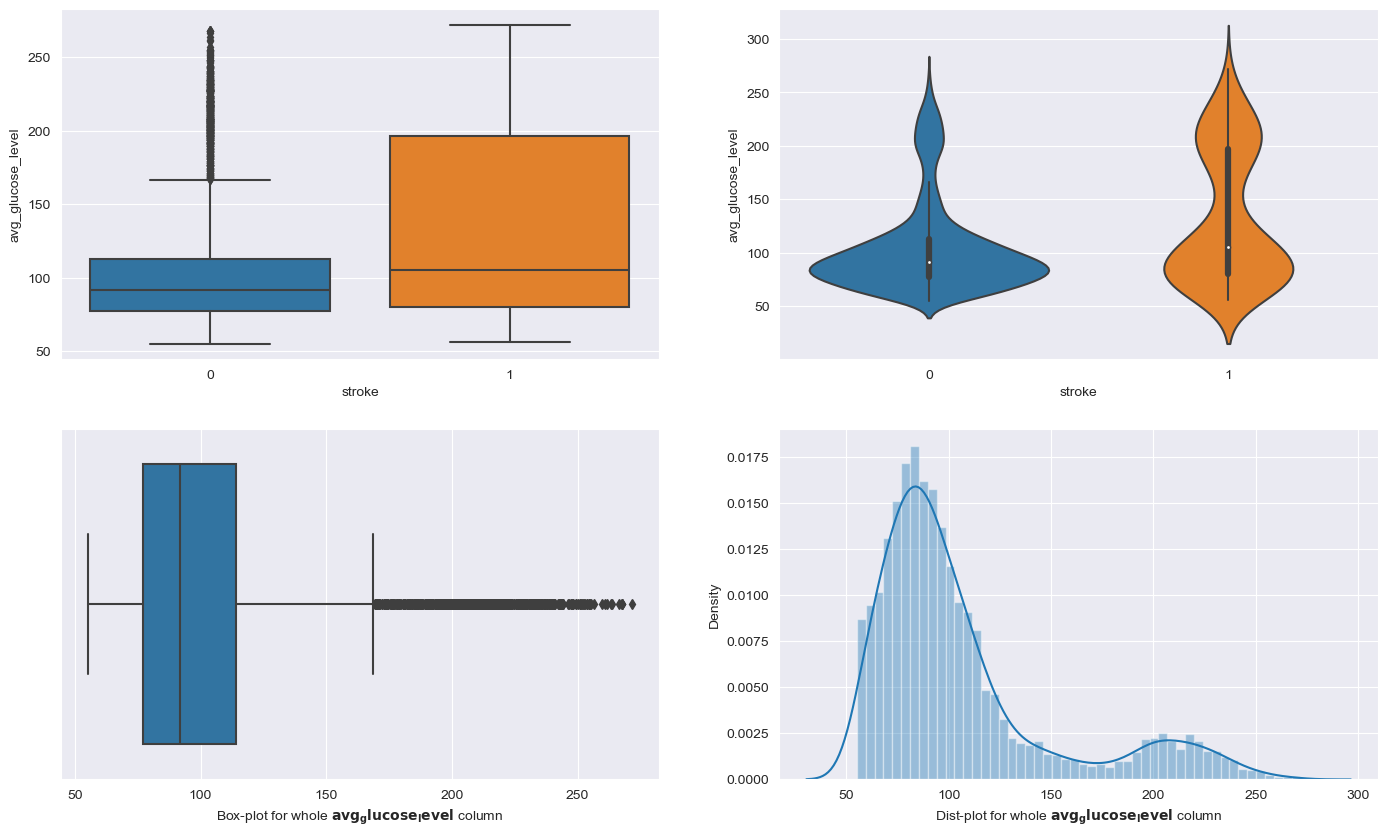

In [38]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('stroke','avg_glucose_level',data=df,ax=ax[0,0])
sns.violinplot('stroke','avg_glucose_level',data=df,ax=ax[0,1])
sns.boxplot('avg_glucose_level',data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Box-plot for whole $\mathbf{avg_glucose_level}$ column')
sns.distplot(df['avg_glucose_level'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{avg_glucose_level}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

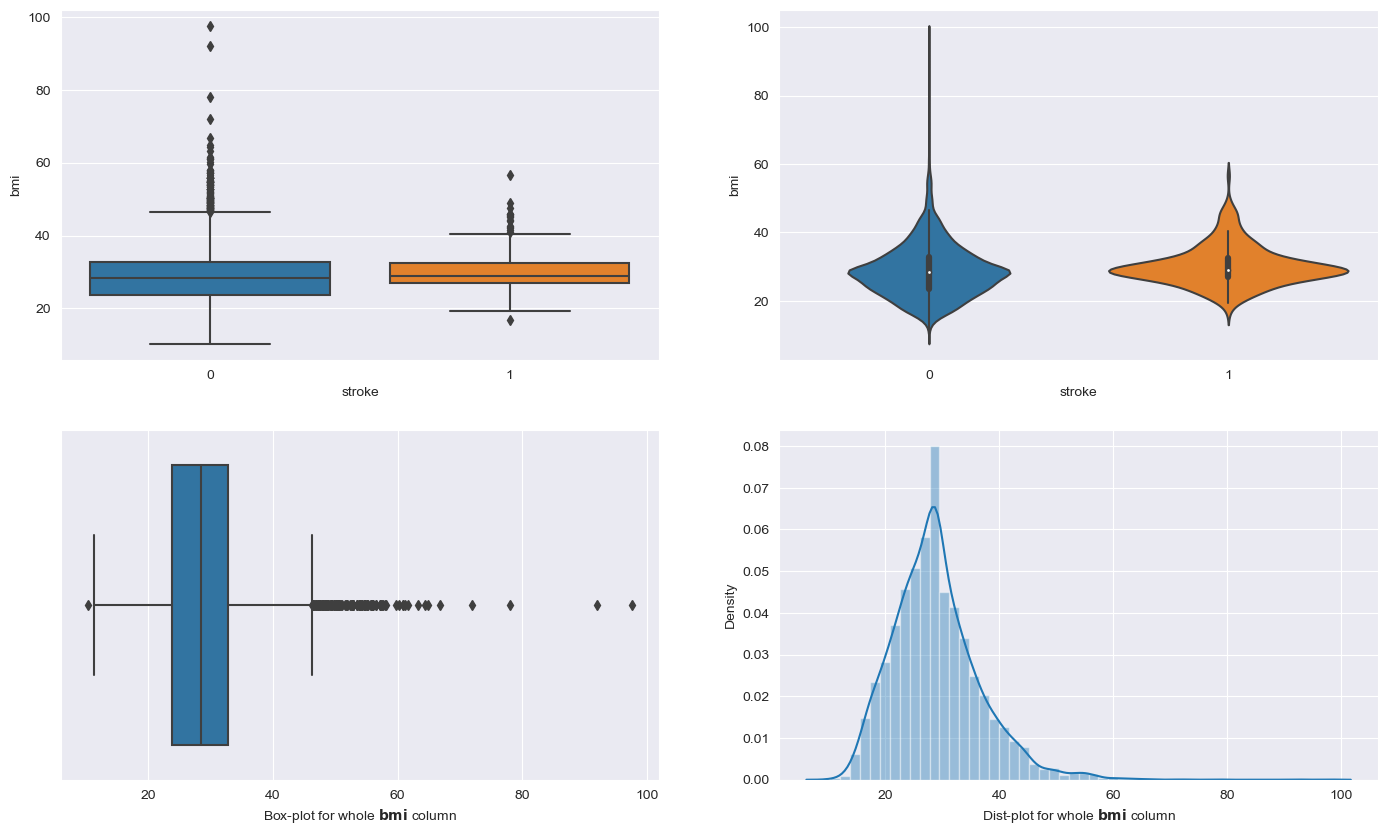

In [39]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('stroke','bmi',data=df,ax=ax[0,0])
sns.violinplot('stroke','bmi',data=df,ax=ax[0,1])
sns.boxplot('bmi',data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Box-plot for whole $\mathbf{bmi}$ column')
sns.distplot(df['bmi'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{bmi}$ column')

plt.show()

# Few columns has outliers
### Those are :
 - avg_glucose_level
 - bmi


# Handling the Outliers

In [13]:
# avg_glucose_level
quantile_25= df['avg_glucose_level'].quantile(0.25)
quantile_75= df['avg_glucose_level'].quantile(0.75)
IQR=quantile_75-quantile_25
upper=quantile_75+1.5*IQR
lower=quantile_25-1.5*IQR
print(df.loc[(df['avg_glucose_level']> upper) | (df['avg_glucose_level']< lower)].shape)
print(upper,lower)
df.loc[(df['avg_glucose_level']> upper) | (df['avg_glucose_level']< lower)]

(627, 11)
169.35750000000002 21.977500000000006


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5061,Male,41.0,0,0,Yes,Private,Urban,223.78,32.300000,never smoked,0
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.900000,never smoked,0
5063,Male,39.0,0,0,Yes,Private,Urban,179.38,27.700000,Unknown,0
5064,Male,70.0,0,0,Yes,Self-employed,Rural,193.88,24.300000,Unknown,0


In [14]:
df['avg_glucose_level']= np.where(df['avg_glucose_level']> upper,
                             upper,
                             np.where(df['avg_glucose_level']<lower,
                                     lower,
                                     df['avg_glucose_level']))

In [15]:
print(df.loc[(df['avg_glucose_level']> upper) | (df['avg_glucose_level']< lower)].shape)


(0, 11)


In [16]:
# bmi
quantile_25= df['bmi'].quantile(0.25)
quantile_75= df['bmi'].quantile(0.75)
IQR=quantile_75-quantile_25
upper=quantile_75+1.5*IQR
lower=quantile_25-1.5*IQR
print(df.loc[(df['bmi']> upper) | (df['bmi']< lower)].shape)
print(upper,lower)
df.loc[(df['bmi']> upper) | (df['bmi']< lower)]

(126, 11)
46.29999999999999 10.300000000000006


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
21,Female,52.0,1,0,Yes,Self-employed,Urban,169.3575,48.9,never smoked,1
66,Female,70.0,0,0,Yes,Private,Urban,169.3575,47.5,never smoked,1
113,Female,45.0,0,0,Yes,Private,Rural,169.3575,56.6,never smoked,1
254,Female,47.0,0,0,Yes,Private,Urban,169.3575,50.1,Unknown,0
258,Female,74.0,1,0,Yes,Self-employed,Urban,169.3575,54.6,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
4906,Female,53.0,0,0,Yes,Private,Urban,70.5100,54.1,never smoked,0
4952,Male,51.0,1,0,Yes,Self-employed,Rural,169.3575,56.6,never smoked,0
5009,Female,50.0,0,0,Yes,Self-employed,Rural,126.8500,49.5,formerly smoked,0
5057,Female,49.0,0,0,Yes,Govt_job,Urban,69.9200,47.6,never smoked,0


In [17]:
df['bmi']= np.where(df['bmi']> upper,
                             upper,
                             np.where(df['bmi']<lower,
                                     lower,
                                     df['bmi']))

In [18]:
df.loc[(df['bmi']> upper) | (df['bmi']< lower)].shape

(0, 11)

##  Visualizating all the columns that had outliers before 

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

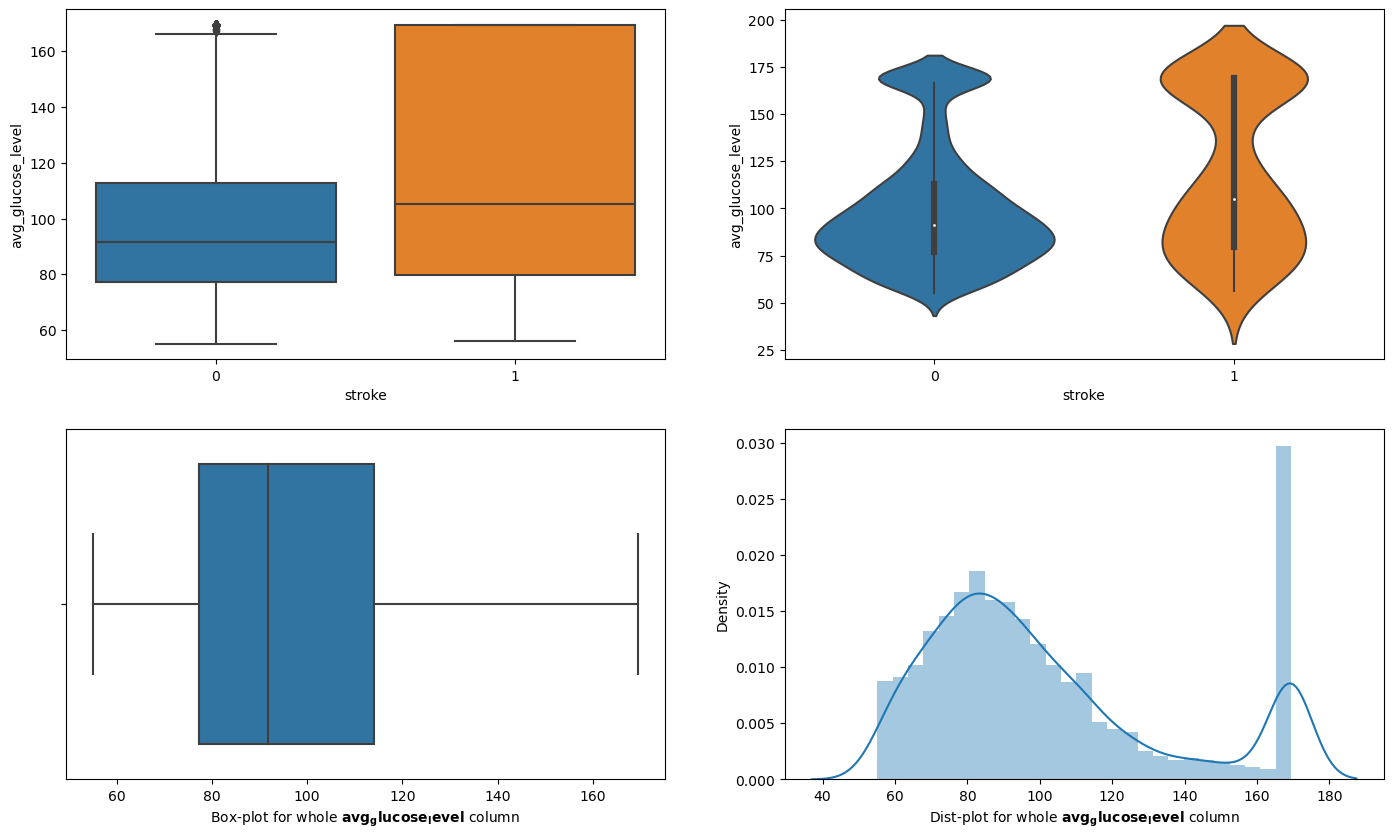

In [19]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('stroke','avg_glucose_level',data=df,ax=ax[0,0])
sns.violinplot('stroke','avg_glucose_level',data=df,ax=ax[0,1])
sns.boxplot('avg_glucose_level',data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Box-plot for whole $\mathbf{avg_glucose_level}$ column')
sns.distplot(df['avg_glucose_level'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{avg_glucose_level}$ column')

plt.show()

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIIT\anaconda3\lib\

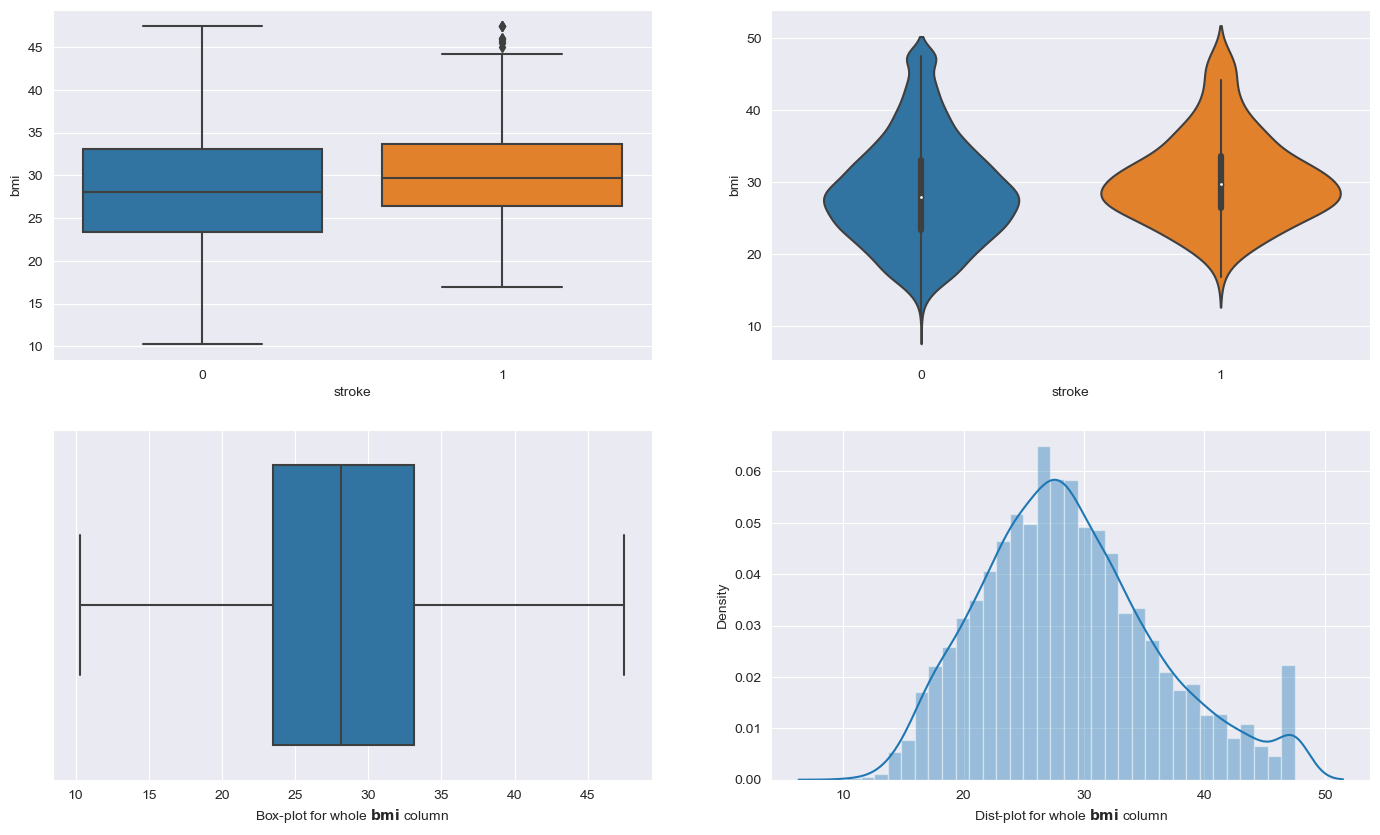

In [90]:
fig,ax= plt.subplots(2,2,figsize=(17,10))
sns.boxplot('stroke','bmi',data=df,ax=ax[0,0])
sns.violinplot('stroke','bmi',data=df,ax=ax[0,1])
sns.boxplot('bmi',data=df,ax=ax[1,0])
ax[1,0].set_xlabel('Box-plot for whole $\mathbf{bmi}$ column')
sns.distplot(df['bmi'],ax=ax[1,1])
ax[1,1].set_xlabel('Dist-plot for whole $\mathbf{bmi}$ column')

plt.show()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


# OneHotCoding

In [20]:
dff=pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],
               drop_first=True)

In [21]:
dff

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,169.3575,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,169.3575,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.9200,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,169.3575,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,169.3575,24.000000,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.7500,28.893237,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.2000,40.000000,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.9900,30.600000,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.2900,25.600000,0,1,0,1,0,1,0,0,0,1,0,0


# Relation between columns

<AxesSubplot:>

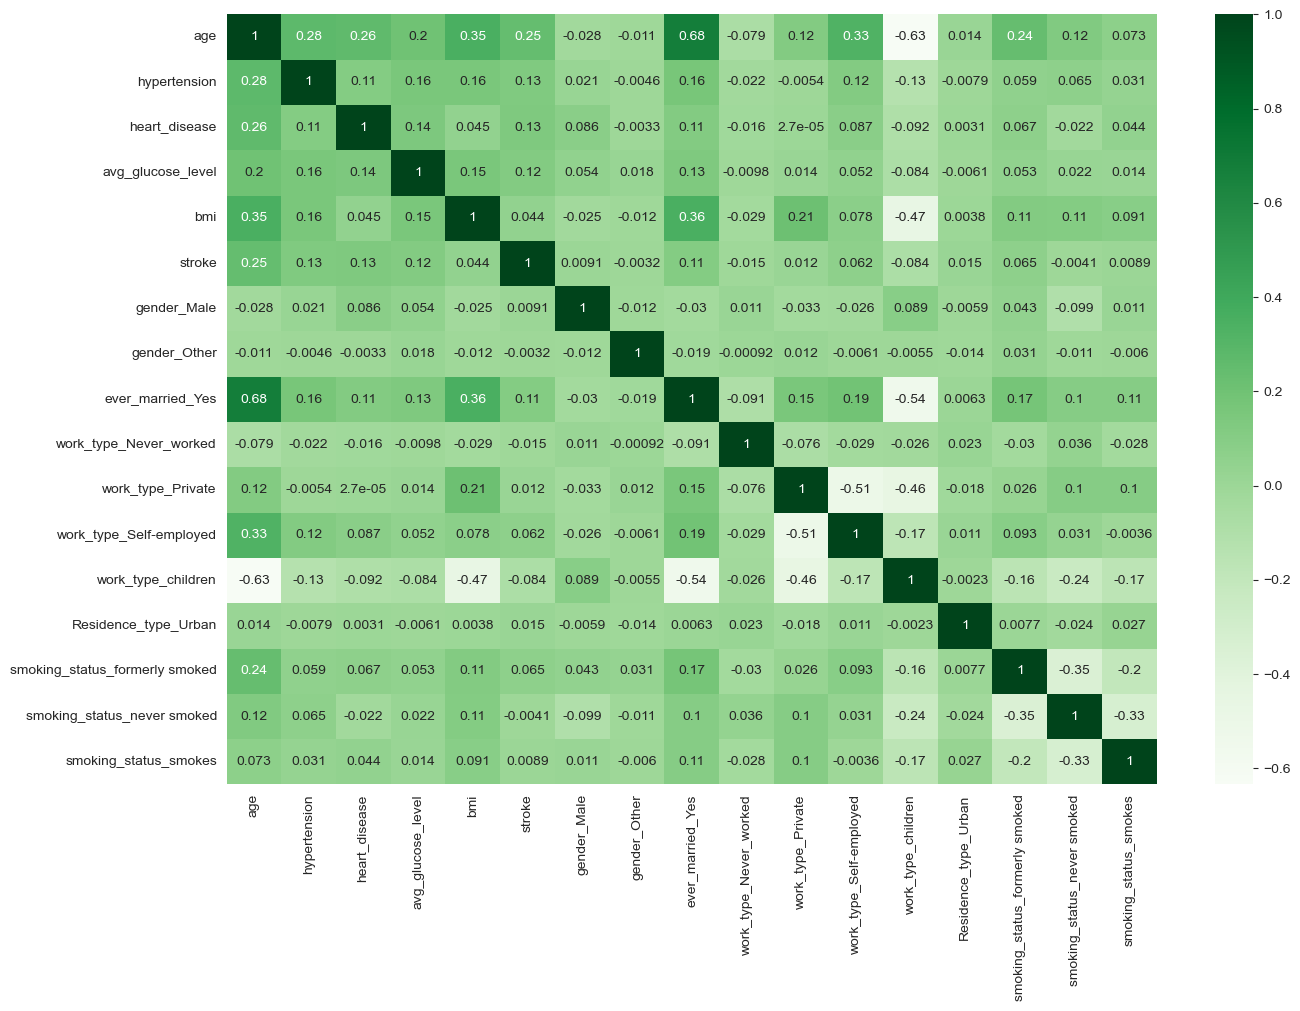

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(dff.corr(),annot=True,cmap='Greens')

<AxesSubplot:>

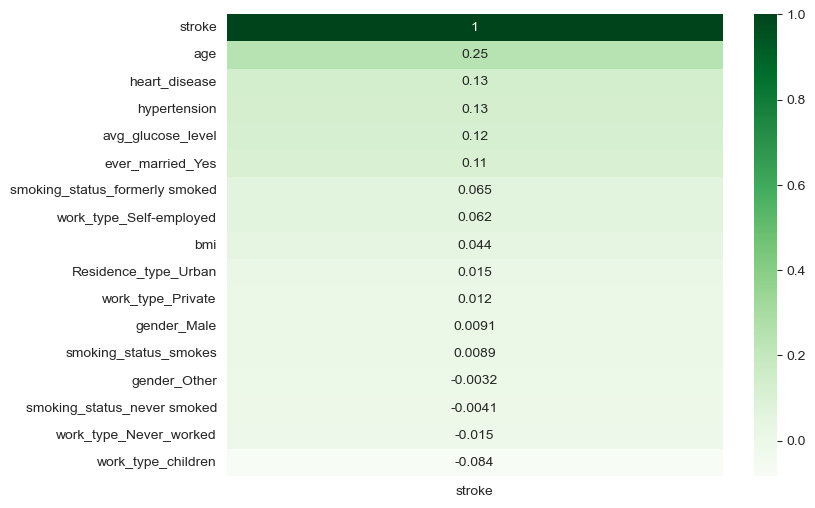

In [101]:
plt.figure(figsize=(8,6))
sns.heatmap(dff.corr()[['stroke']].sort_values(by='stroke',ascending=False),annot=True,cmap='Greens')

In [26]:
# plt.figure(figsize=(20,20))
# sns.pairplot(df)

In [102]:
df.corr()[['stroke']]

,stroke
age,0.245257
hypertension,0.127904
heart_disease,0.134914
avg_glucose_level,0.115652
bmi,0.044325
stroke,1.000000


# Distribution of Stroke 

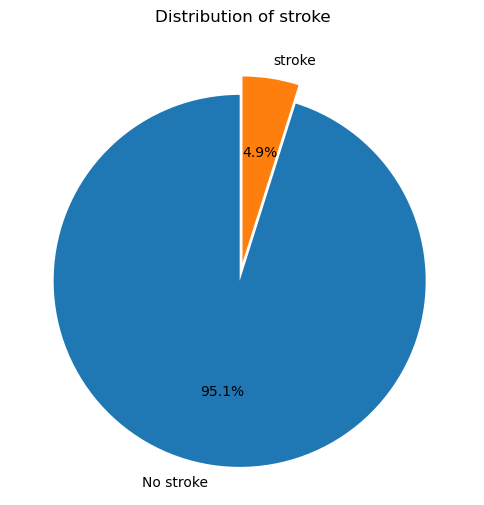

In [5]:
plt.figure(figsize=(6,8))
plt.pie(df['stroke'].value_counts(),
        labels=['No stroke','stroke'],
        explode=(.1,0),
        autopct="%1.1f%%",startangle=90)
plt.title('Distribution of stroke')
plt.show()

# Data Imbalance

## Using SMOTE technique to balance the data

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm=SMOTE(sampling_strategy='minority',random_state=42,n_jobs=-1)
X=dff.loc[:,dff.columns!='stroke']
y=dff.loc[:,dff.columns=='stroke']
x_sm,y_sm=sm.fit_resample(X,y)


C:\Users\KIIT\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:363: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [150]:
print(f'After SMOTE, Total Sample {y_sm.shape[0]}')
print(f'Before SMOTE, Total Sample {df.shape[0]}')
print((y_sm['stroke']==1).sum())
print((y_sm['stroke']==0).sum())

After SMOTE, Total Sample 9722
Before SMOTE, Total Sample 5110
4861
4861


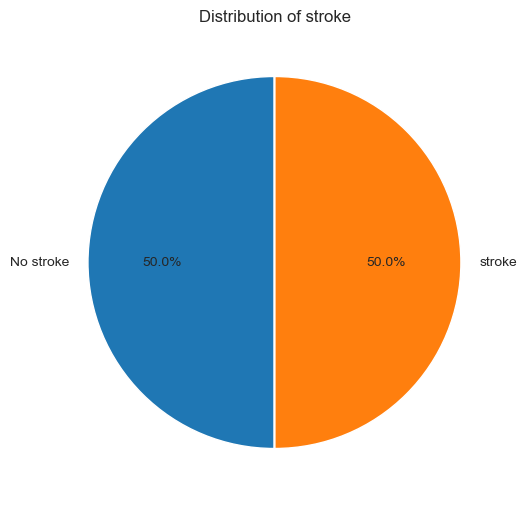

In [151]:
plt.figure(figsize=(6,8))
plt.pie(y_sm['stroke'].value_counts(),
        labels=['No stroke','stroke'],
        explode=(.005,0),
        autopct="%1.1f%%",startangle=90)
plt.title('Distribution of stroke')
plt.show()

In [23]:
x_sm

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.000000,0,1,169.357500,36.600000,1,0,1,0,1,0,0,1,1,0,0
1,61.000000,0,0,169.357500,28.893237,0,0,1,0,0,1,0,0,0,1,0
2,80.000000,0,1,105.920000,32.500000,1,0,1,0,1,0,0,0,0,1,0
3,49.000000,0,0,169.357500,34.400000,0,0,1,0,1,0,0,1,0,0,1
4,79.000000,1,0,169.357500,24.000000,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,78.128493,0,0,169.357500,26.440220,0,0,1,0,0,1,0,0,0,0,0
9718,70.908861,0,0,169.357500,38.718228,0,0,1,0,0,0,0,0,0,0,0
9719,80.000000,0,0,169.357500,31.557449,1,0,1,0,1,0,0,0,0,0,0
9720,74.953742,0,0,78.622369,29.175103,0,0,1,0,0,1,0,0,0,0,0


In [24]:
x_sm.to_csv('heart_stroke_df.csv')

# MinMaxScaler to limit  data range 0-1

In [169]:
from sklearn.preprocessing import Normalizer,StandardScaler,minmax_scale

In [176]:
x_sm['age']=minmax_scale(x_sm[['age']])
x_sm['avg_glucose_level']=minmax_scale(x_sm[['avg_glucose_level']])
x_sm['bmi']=minmax_scale(x_sm[['bmi']])

In [177]:
x_sm

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,1.000000,0.706989,1,0,1,0,1,0,0,1,1,0,0
1,0.743652,0,0,1.000000,0.495793,0,0,1,0,0,1,0,0,0,1,0
2,0.975586,0,1,0.444688,0.596774,1,0,1,0,1,0,0,0,0,1,0
3,0.597168,0,0,1.000000,0.647849,0,0,1,0,1,0,0,1,0,0,1
4,0.963379,1,0,1.000000,0.368280,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,0.952740,0,0,1.000000,0.433877,0,0,1,0,0,1,0,0,0,0,0
9718,0.864610,0,0,1.000000,0.763931,0,0,1,0,0,0,0,0,0,0,0
9719,0.975586,0,0,1.000000,0.571437,1,0,1,0,1,0,0,0,0,0,0
9720,0.913986,0,0,0.205733,0.507395,0,0,1,0,0,1,0,0,0,0,0


In [178]:
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error

In [179]:
X=x_sm
y=y_sm

In [180]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

# Importing necessary Algorithm and Library

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

In [182]:
lrg=LogisticRegression()
sgdc=SGDClassifier()
sv=SVC()
knn=KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
sc=StackingClassifier(estimators=dtc)
xgc=xgb.XGBClassifier()
lgc=lgb.LGBMClassifier()
cat=cb.CatBoostClassifier()

In [183]:
all_model={'lrg':lrg,
         'sgdc':sgdc,
         'sv':sv,
         'knn':knn,
         'gnb':gnb,
         'mnb':mnb,
         'dtc':dtc,
         'rfc':rfc,
         'abc':abc,
         'bc':bc,
         'gbc':gbc,
#          'sc':sc,
         'xgc':xgc,
         'lgc':lgc,
         'cat':cat
        }

In [184]:
def traning(X,y):
    store=[]
    for key,model in all_model.items():
        print(key)
        try:
            score=cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='accuracy').mean()
            store.append(score)
            print(score)
        except:
            score=cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='r2').mean()
            store.append(score)
            print(score)
        print('-----------------------------------------')
    arr.append(store)
#     print(arr)
    
    

In [186]:
x_train.shape

(7777, 16)

# Feature selection

In [185]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import chi2

In [187]:
arr=[]
for i in range(1,16):
    print(f"================{i}=================")
    feature1=SelectKBest(chi2,k=i).fit(X,y)
    xx_train=feature1.transform(X)
    traning(xx_train,y)

================1=================
lrg
0.5699462652100542
-----------------------------------------
sgdc
0.5699462652100542
-----------------------------------------
sv
0.5699462652100542
-----------------------------------------
knn
0.563676994912007
-----------------------------------------
gnb
0.5699462652100542
-----------------------------------------
mnb
0.49989722507708123
-----------------------------------------
dtc
0.5699462652100542
-----------------------------------------
rfc
0.5699462652100542
-----------------------------------------
abc
0.5699462652100542
-----------------------------------------
bc
0.5699462652100542
-----------------------------------------
gbc
0.5699462652100542
-----------------------------------------
xgc
0.5699462652100542
-----------------------------------------
lgc
0.5699462652100542
-----------------------------------------
cat
0.5699462652100542
-----------------------------------------
================2=================
lrg
0.762085781110561

0.8771957037544567
-----------------------------------------
xgc
0.9506412859130686
-----------------------------------------
lgc
0.9355199438332932
-----------------------------------------
cat
0.9365489618886901
-----------------------------------------
================10=================
lrg
0.8622806516691408
-----------------------------------------
sgdc
0.8584750189266576
-----------------------------------------
sv
0.8709228384488178
-----------------------------------------
knn
0.9121676204010336
-----------------------------------------
gnb
0.7700104466691198
-----------------------------------------
mnb
0.814346829414775
-----------------------------------------
dtc
0.9129907714040408
-----------------------------------------
rfc
0.9319176404907822
-----------------------------------------
abc
0.8655730442101346
-----------------------------------------
bc
0.9290387795583639
-----------------------------------------
gbc
0.8893323436488905
-------------------------------------

In [194]:
len(arr[0])

14

# Accuracy Chart

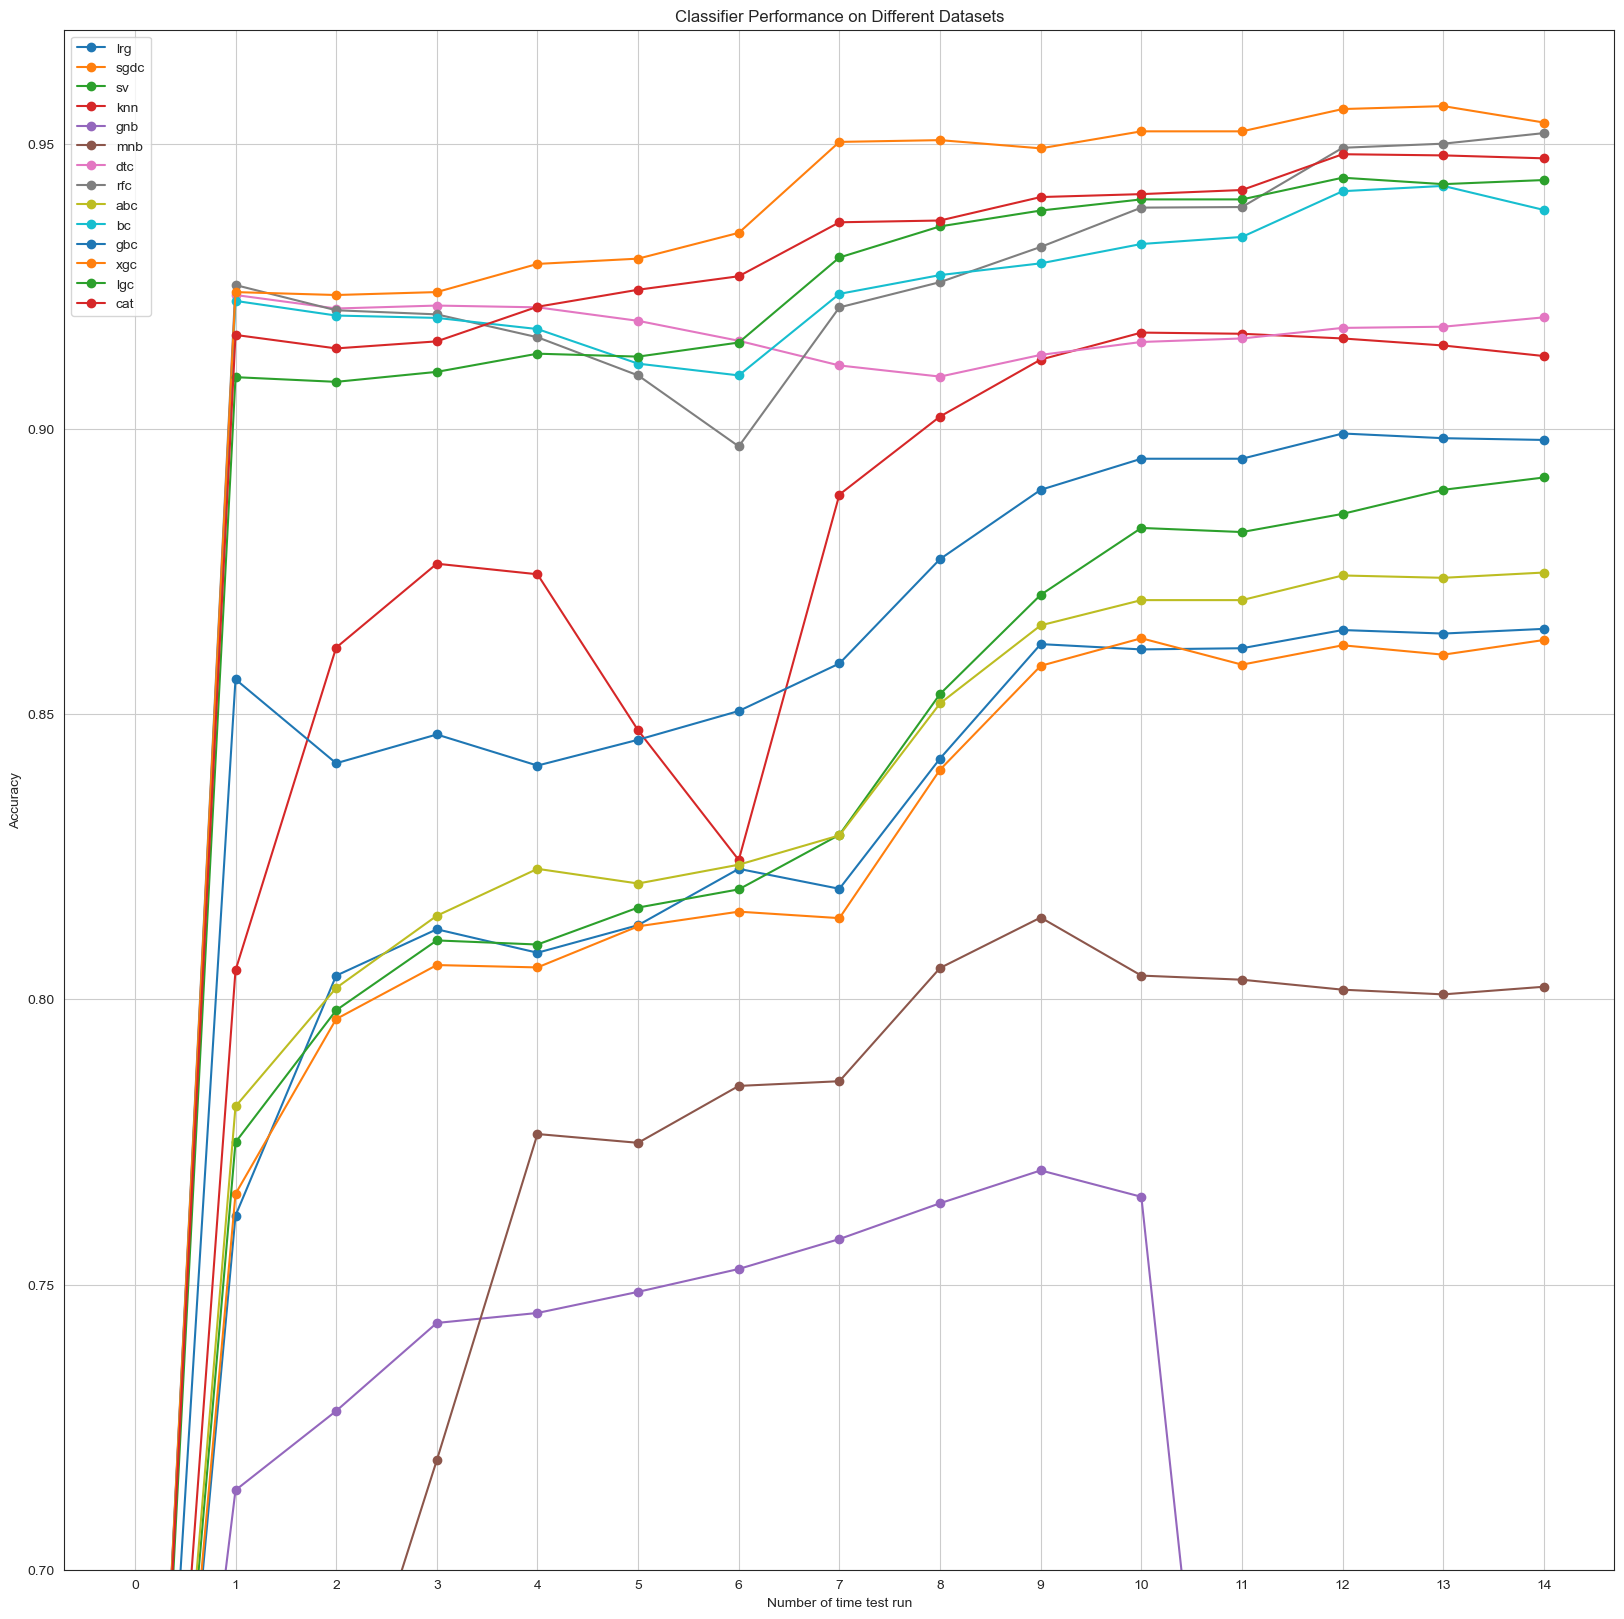

In [214]:
new=np.array(arr).reshape(15,14)
neww=pd.DataFrame(new,columns=all_model)
sns.set_style('white')
plt.figure(figsize=(20, 20))

# Plot each classifier's performance for each dataset
for classifier in neww.columns:
    plt.plot(neww.index, neww[classifier], marker='o', label=classifier)
    plt.ylim(.7,.97)

# Adding labels and title
plt.xlabel('Number of time test run')
plt.ylabel('Accuracy')
plt.title('Classifier Performance on Different Datasets')
plt.xticks(neww.index)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### By using  SelectKBest and chi2 function we find
 - top 13 feature gives - 95.3%  accuracy (Xgboost)
 - top 14 feature gives - 95.6% accuracy (Xgboost)

In [201]:
feature2=SelectKBest(chi2,k=14).fit(X,y)
xxy_train=feature1.transform(X)
feature_dataframe=pd.DataFrame({'Feature':list(X.columns),
                                'Score':feature2.scores_,
                                'Pvalue':feature2.pvalues_
                               })


In [202]:
feature_dataframe.sort_values(by='Score')

,Feature,Score,Pvalue
6,gender_Other,1.000000,3.173105e-01
1,hypertension,1.392771,2.379377e-01
2,heart_disease,3.368737,6.644466e-02
4,bmi,7.035500,7.990956e-03
8,work_type_Never_worked,22.000000,2.726505e-06
7,ever_married_Yes,73.230912,1.153352e-17
10,work_type_Self-employed,81.391304,1.851709e-19
13,smoking_status_formerly smoked,114.820943,8.613410e-27
3,avg_glucose_level,130.856249,2.662022e-30
9,work_type_Private,166.165917,5.088891e-38


In [203]:
acc_kbest=cross_val_score(xgc,xxy_train,y,cv=10,scoring='accuracy')
print(acc_kbest.mean())

0.9537265425754633


In [204]:
xxy_train.shape

(9722, 15)

# Feature selection (RFE)

In [205]:
rfe=RFE(xgc,step=1).fit(X,y)
x_train_rfe=rfe.transform(X)


In [206]:
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,age,1
5,gender_Male,1
7,ever_married_Yes,1
9,work_type_Private,1
10,work_type_Self-employed,1
13,smoking_status_formerly smoked,1
14,smoking_status_never smoked,1
15,smoking_status_smokes,1
12,Residence_type_Urban,2
2,heart_disease,3


In [207]:
acc_rfe=cross_val_score(xgc,x_train_rfe,y,cv=10,scoring='accuracy')
print(acc_rfe.mean())

0.9450876335968263


In [208]:
x_train_rfe.shape

(9722, 8)

In [209]:
rfe_col=list(rfe.get_feature_names_out())
rfe_col

['age',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Private',
 'work_type_Self-employed',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

# Feature selection (RFECV)

In [210]:
rfecv=RFECV( estimator=xgc,
            step=1,
            cv=10,
            scoring='accuracy',
            n_jobs=-1
        ).fit(X,y)


In [215]:
rfecv_data=pd.DataFrame({
                'Feature':X.columns,
                'Ranking':rfecv.ranking_
})
rfecv_data.sort_values(by='Ranking')

,Feature,Ranking
0,age,1
1,hypertension,1
2,heart_disease,1
3,avg_glucose_level,1
4,bmi,1
5,gender_Male,1
7,ever_married_Yes,1
9,work_type_Private,1
10,work_type_Self-employed,1
12,Residence_type_Urban,1


In [216]:
rfecv.get_feature_names_out()

array(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'ever_married_Yes', 'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [217]:
trans_x_train=rfecv.transform(X)
acc=cross_val_score(xgc,trans_x_train,y,cv=10,scoring='accuracy')
print(acc.mean())

0.9550633567220299


In [218]:
trans_x_train.shape

(9722, 13)

In [219]:
rfecv_col=list(rfecv.get_feature_names_out())
rfecv_col

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Private',
 'work_type_Self-employed',
 'Residence_type_Urban',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

# Feature selection (FORWARD Technique)

In [220]:
forward=SequentialFeatureSelector(
                                xgc,
                                direction='forward',
                                scoring='accuracy',
                                cv=10,
                                n_jobs=-1).fit(X,y)

In [221]:
for_x_train=forward.transform(X)
acc_for=cross_val_score(xgc,for_x_train,y,cv=10,scoring='accuracy')
print(acc_for.mean())

0.9541380652092084


In [222]:
list(forward.get_feature_names_out())

['age',
 'avg_glucose_level',
 'bmi',
 'gender_Other',
 'ever_married_Yes',
 'work_type_Never_worked',
 'work_type_Self-employed',
 'Residence_type_Urban']

In [223]:
for_x_train.shape

(9722, 8)

# Feature selection (BACKWARD Technique)

In [224]:
backward=SequentialFeatureSelector(
                                xgc,
                                direction='backward',
                                scoring='accuracy',
                                cv=10,
                                n_jobs=-1).fit(X,y)

In [225]:
back_x_train=backward.transform(X)
acc_back=cross_val_score(xgc,back_x_train,y,cv=10,scoring='accuracy')
print(acc_back.mean())

0.9554750908268096


In [226]:
back_x_train.shape

(9722, 8)

In [227]:
back_col=list(backward.get_feature_names_out())
back_col

['age',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'work_type_Private',
 'work_type_Self-employed',
 'Residence_type_Urban']

### we got best accuracy at 6 colums in Backward selection

In [228]:
cc=back_col

In [247]:
print(x_sm.columns)
print('-----------------')
print(cc)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')
-----------------
['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed', 'Residence_type_Urban']


In [248]:
arr=[]
traning(xx_train,y)

lrg
0.8649561832015868
-----------------------------------------
sgdc
0.8613556773628716
-----------------------------------------
sv
0.8914957980705382
-----------------------------------------
knn
0.9127874420040687
-----------------------------------------
gnb
0.6044029326803109
-----------------------------------------
mnb
0.802209343636202
-----------------------------------------
dtc
0.9198824009575407
-----------------------------------------
rfc
0.9505371364284233
-----------------------------------------
abc
0.8748324092049111
-----------------------------------------
bc
0.9424109389736888
-----------------------------------------
gbc
0.8980775168225208
-----------------------------------------
xgc
0.9537265425754633
-----------------------------------------
lgc
0.9436451896683712
-----------------------------------------
cat
0.9474523027080982
-----------------------------------------


In [238]:
for i in range(4):
    if i<1:
        traning(x_train_rfe,y)
    elif i<2:
        traning(trans_x_train,y)
    elif i<3:
        traning(for_x_train,y)
    else:
        traning(back_x_train,y)
    

lrg
0.8553889163801234
-----------------------------------------
sgdc
0.8502455178714172
-----------------------------------------
sv
0.8602265277724909
-----------------------------------------
knn
0.8677350183345387
-----------------------------------------
gnb
0.827102867970174
-----------------------------------------
mnb
0.7849312084723754
-----------------------------------------
dtc
0.9268805061770691
-----------------------------------------
rfc
0.9135085582327788
-----------------------------------------
abc
0.8642362300635682
-----------------------------------------
bc
0.9212236559958382
-----------------------------------------
gbc
0.880694174818875
-----------------------------------------
xgc
0.9450876335968263
-----------------------------------------
lgc
0.9323334982807406
-----------------------------------------
cat
0.9354186492076181
-----------------------------------------
lrg
0.8646473297552433
-----------------------------------------
sgdc
0.861046295238941
-----

In [239]:
len(arr)

4

In [249]:
new=np.array(arr).reshape(5,14)

In [250]:
neww=pd.DataFrame(new,columns=all_model)
neww

,lrg,sgdc,sv,knn,gnb,mnb,dtc,rfc,abc,bc,gbc,xgc,lgc,cat
0,0.855389,0.850246,0.860227,0.867735,0.827103,0.784931,0.926881,0.913509,0.864236,0.921224,0.880694,0.945088,0.932333,0.935419
1,0.864647,0.861046,0.892216,0.913713,0.832862,0.793368,0.919471,0.951771,0.874009,0.941793,0.899003,0.955063,0.944159,0.948069
2,0.799326,0.799427,0.815886,0.893132,0.534461,0.603794,0.905480,0.934998,0.830392,0.932840,0.858574,0.954138,0.936752,0.940970
3,0.817020,0.816815,0.839546,0.903421,0.791611,0.726711,0.916075,0.943641,0.840781,0.938601,0.867833,0.955475,0.940249,0.946937
4,0.864956,0.861356,0.891496,0.912787,0.604403,0.802209,0.919882,0.950537,0.874832,0.942411,0.898078,0.953727,0.943645,0.947452


# Plotting all 5 Feature selection technique accuracy

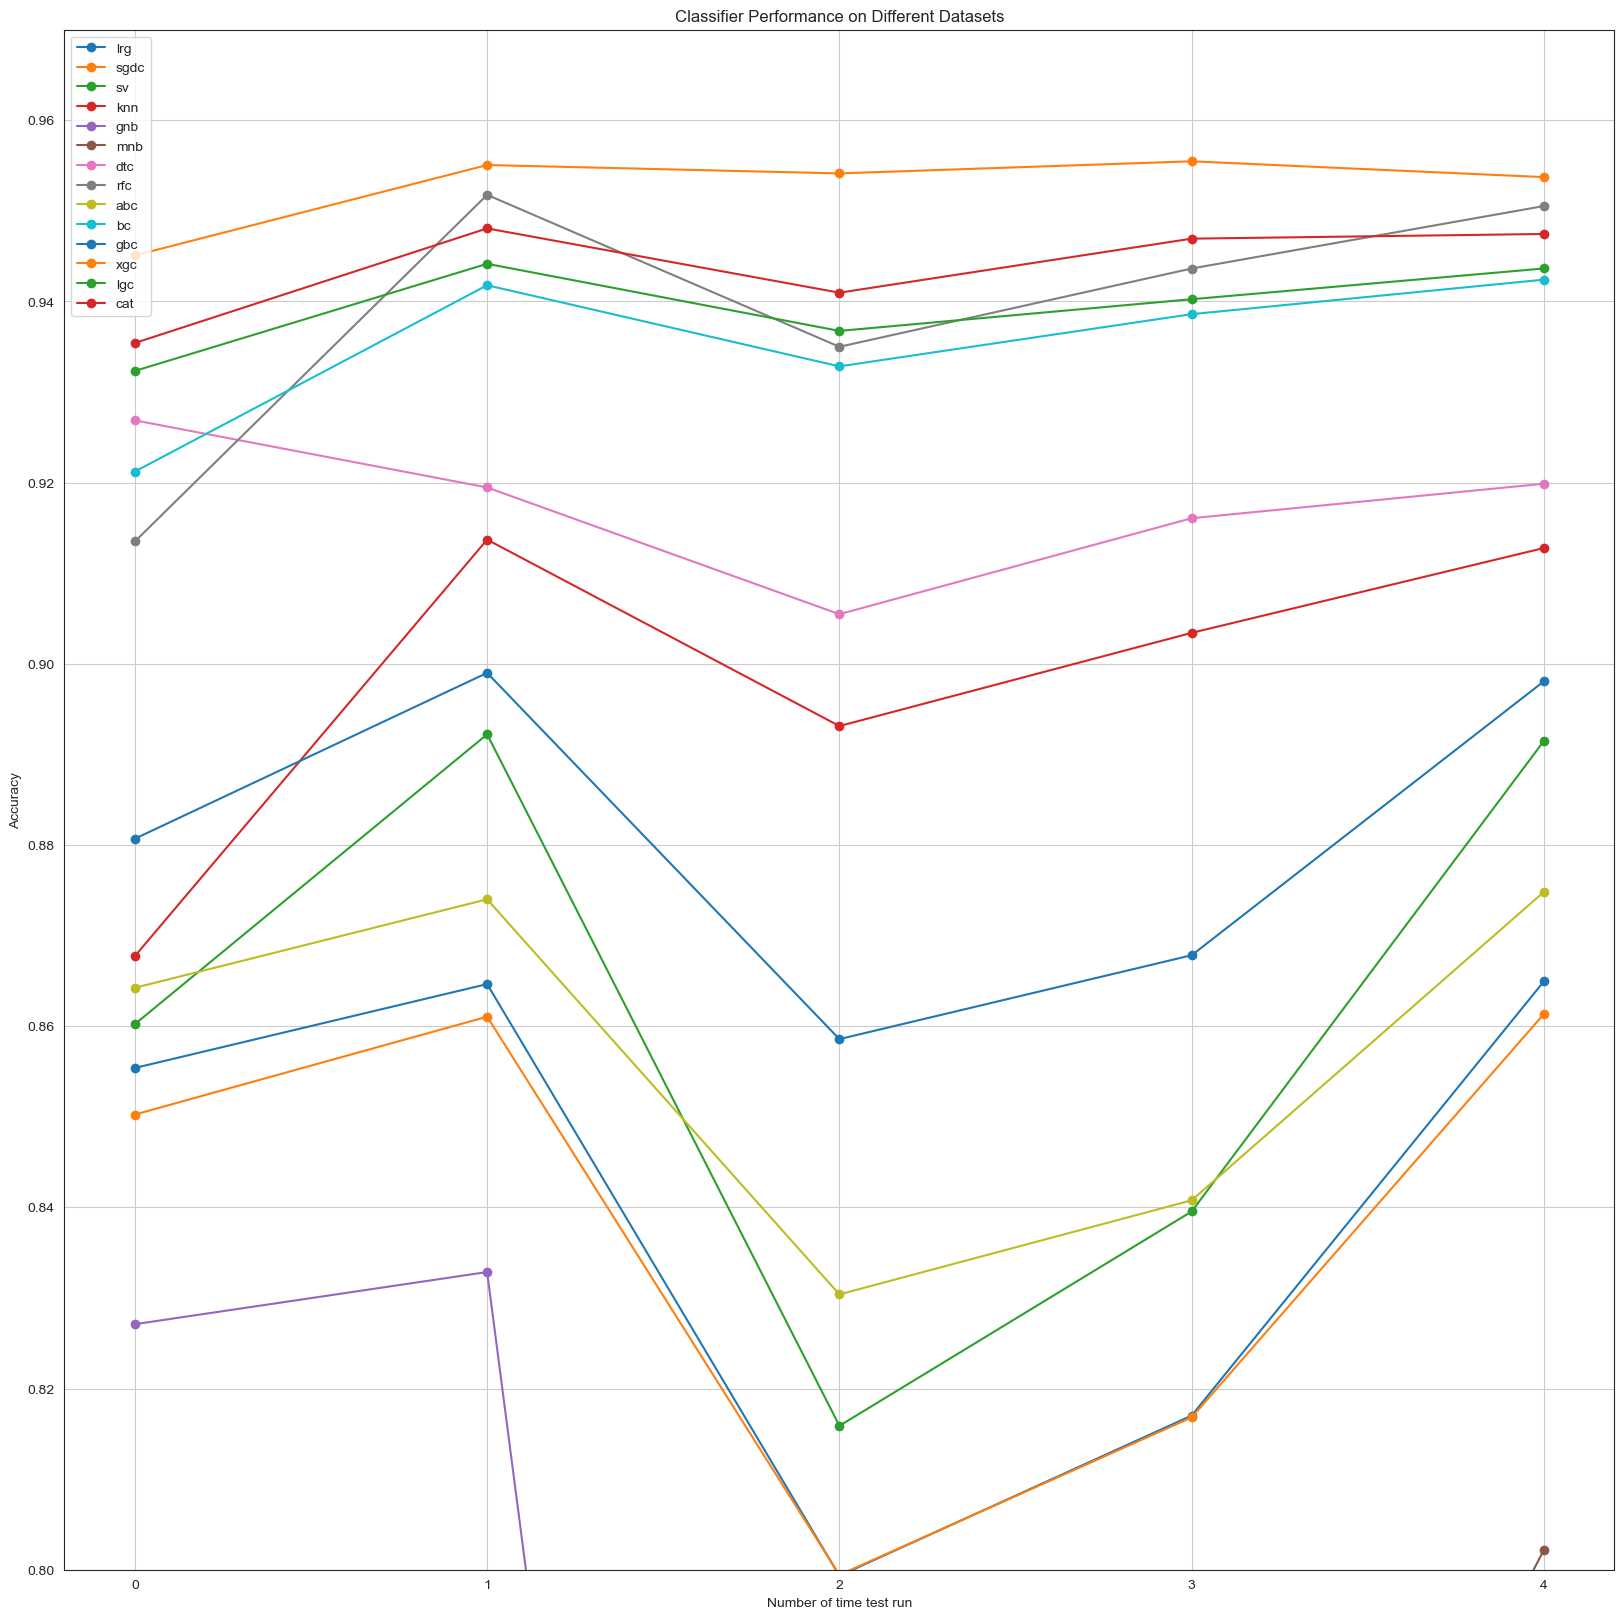

In [251]:

plt.figure(figsize=(20, 20))

# Plot each classifier's performance for each dataset
for classifier in neww.columns:
    plt.plot(neww.index, neww[classifier], marker='o', label=classifier)

# Adding labels and title
plt.xlabel('Number of time test run')
plt.ylabel('Accuracy')
plt.title('Classifier Performance on Different Datasets')
plt.xticks(neww.index)
plt.ylim(.8,.97)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Here we can see Backward,Forward  and KBestselector feature selection giving the best result
##### Top 6 Algorithom
 - Catboost
 - LIGHTGBM
 - Xgboost
 - RandomForestClassifier
 - DecisionTreeClassifier

In [253]:
models_layer1 = [
    ('rf1', RandomForestClassifier(100)),
    ('gb1', xgb.XGBClassifier()),
    ('sgd1', lgb.LGBMClassifier()),
    ('rf4', RandomForestClassifier(100))
]

models_layer2 = [
    ('rf674', RandomForestClassifier(100)),
    ('gb474', xgb.XGBClassifier()),
]
models_layer3 = [
    ('rf', RandomForestClassifier(100)),]

meta =  RandomForestClassifier(100)

In [254]:
scc=StackingClassifier(estimators=models_layer1,
            final_estimator=StackingClassifier(estimators=models_layer2,
                            final_estimator=StackingClassifier(estimators=models_layer3,
                                            final_estimator=meta, cv=5, stack_method='predict'),
                                                       cv=5, stack_method='predict'),
                                                               cv=5, stack_method='predict')

In [256]:
ssc=cross_val_score(scc,back_x_train,y,cv=10,n_jobs=-1,scoring='accuracy').mean()
print(ssc)

0.9552694352454545


### Creating new DataFrame for new selected Features

# KBestselector

In [265]:
new_df=x_sm.loc[:,x_sm.columns!='work_type_children'].copy(deep=True)

In [266]:
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,1.000000,0.706989,1,0,1,0,1,0,1,1,0,0
1,0.743652,0,0,1.000000,0.495793,0,0,1,0,0,1,0,0,1,0
2,0.975586,0,1,0.444688,0.596774,1,0,1,0,1,0,0,0,1,0
3,0.597168,0,0,1.000000,0.647849,0,0,1,0,1,0,1,0,0,1
4,0.963379,1,0,1.000000,0.368280,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,0.952740,0,0,1.000000,0.433877,0,0,1,0,0,1,0,0,0,0
9718,0.864610,0,0,1.000000,0.763931,0,0,1,0,0,0,0,0,0,0
9719,0.975586,0,0,1.000000,0.571437,1,0,1,0,1,0,0,0,0,0
9720,0.913986,0,0,0.205733,0.507395,0,0,1,0,0,1,0,0,0,0


In [268]:
from sklearn.metrics import classification_report,confusion_matrix
selected_model={
         'bc':bc,
         'rfc':rfc,
         'xgc':xgc,
         'lgc':lgc,
         'cat':cat
        }

# Matrice evaluation

In [270]:

x_train,x_test,y_train,y_test=train_test_split(new_df,y,test_size=.2,random_state=42)

for key,model in selected_model.items():
    print(f'-------{key}----------')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))

-------bc----------


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.95      0.94      0.94       975
           1       0.94      0.95      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

-------rfc----------


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21400\540683375.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       0.96      0.93      0.94       975
           1       0.93      0.96      0.95       970

    accuracy                           0.94      1945
   macro avg       0.95      0.95      0.94      1945
weighted avg       0.95      0.94      0.94      1945

-------xgc----------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       975
           1       0.96      0.96      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

-------lgc----------


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3891, number of negative: 3886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 7777, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500321 -> initscore=0.001286
[LightGBM] [Info] Start training from score 0.001286
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       975
           1       0.94      0.95      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

-------cat----------
Learning rate set to

144:	learn: 0.2520421	total: 1.97s	remaining: 11.6s
145:	learn: 0.2515047	total: 1.98s	remaining: 11.6s
146:	learn: 0.2510675	total: 1.99s	remaining: 11.6s
147:	learn: 0.2505576	total: 2s	remaining: 11.5s
148:	learn: 0.2501350	total: 2.02s	remaining: 11.5s
149:	learn: 0.2496745	total: 2.03s	remaining: 11.5s
150:	learn: 0.2491231	total: 2.04s	remaining: 11.5s
151:	learn: 0.2483634	total: 2.06s	remaining: 11.5s
152:	learn: 0.2476158	total: 2.07s	remaining: 11.4s
153:	learn: 0.2471614	total: 2.08s	remaining: 11.4s
154:	learn: 0.2467775	total: 2.09s	remaining: 11.4s
155:	learn: 0.2463116	total: 2.1s	remaining: 11.4s
156:	learn: 0.2457638	total: 2.12s	remaining: 11.4s
157:	learn: 0.2452175	total: 2.13s	remaining: 11.4s
158:	learn: 0.2447942	total: 2.15s	remaining: 11.3s
159:	learn: 0.2443359	total: 2.16s	remaining: 11.3s
160:	learn: 0.2439211	total: 2.17s	remaining: 11.3s
161:	learn: 0.2433535	total: 2.18s	remaining: 11.3s
162:	learn: 0.2429285	total: 2.19s	remaining: 11.3s
163:	learn: 0.24

309:	learn: 0.1938013	total: 4s	remaining: 8.91s
310:	learn: 0.1935518	total: 4.01s	remaining: 8.89s
311:	learn: 0.1933132	total: 4.02s	remaining: 8.87s
312:	learn: 0.1931049	total: 4.03s	remaining: 8.85s
313:	learn: 0.1928583	total: 4.04s	remaining: 8.84s
314:	learn: 0.1923835	total: 4.05s	remaining: 8.82s
315:	learn: 0.1921699	total: 4.07s	remaining: 8.8s
316:	learn: 0.1918164	total: 4.08s	remaining: 8.78s
317:	learn: 0.1916563	total: 4.09s	remaining: 8.76s
318:	learn: 0.1913639	total: 4.1s	remaining: 8.75s
319:	learn: 0.1911528	total: 4.11s	remaining: 8.73s
320:	learn: 0.1909424	total: 4.12s	remaining: 8.71s
321:	learn: 0.1907494	total: 4.13s	remaining: 8.7s
322:	learn: 0.1904741	total: 4.14s	remaining: 8.68s
323:	learn: 0.1903268	total: 4.15s	remaining: 8.66s
324:	learn: 0.1901121	total: 4.16s	remaining: 8.65s
325:	learn: 0.1899332	total: 4.17s	remaining: 8.63s
326:	learn: 0.1896468	total: 4.19s	remaining: 8.62s
327:	learn: 0.1893829	total: 4.2s	remaining: 8.6s
328:	learn: 0.189176

472:	learn: 0.1570014	total: 6.02s	remaining: 6.71s
473:	learn: 0.1568307	total: 6.04s	remaining: 6.7s
474:	learn: 0.1566564	total: 6.05s	remaining: 6.68s
475:	learn: 0.1564352	total: 6.06s	remaining: 6.67s
476:	learn: 0.1562534	total: 6.08s	remaining: 6.66s
477:	learn: 0.1561486	total: 6.08s	remaining: 6.64s
478:	learn: 0.1559624	total: 6.1s	remaining: 6.63s
479:	learn: 0.1557687	total: 6.11s	remaining: 6.62s
480:	learn: 0.1556423	total: 6.12s	remaining: 6.61s
481:	learn: 0.1553192	total: 6.13s	remaining: 6.59s
482:	learn: 0.1551384	total: 6.15s	remaining: 6.58s
483:	learn: 0.1549523	total: 6.16s	remaining: 6.57s
484:	learn: 0.1548263	total: 6.17s	remaining: 6.55s
485:	learn: 0.1546794	total: 6.18s	remaining: 6.54s
486:	learn: 0.1544487	total: 6.2s	remaining: 6.53s
487:	learn: 0.1543521	total: 6.21s	remaining: 6.51s
488:	learn: 0.1541196	total: 6.22s	remaining: 6.5s
489:	learn: 0.1539411	total: 6.23s	remaining: 6.49s
490:	learn: 0.1537752	total: 6.25s	remaining: 6.48s
491:	learn: 0.15

636:	learn: 0.1320558	total: 8.08s	remaining: 4.6s
637:	learn: 0.1319612	total: 8.09s	remaining: 4.59s
638:	learn: 0.1318135	total: 8.1s	remaining: 4.58s
639:	learn: 0.1315093	total: 8.12s	remaining: 4.57s
640:	learn: 0.1314251	total: 8.13s	remaining: 4.55s
641:	learn: 0.1312657	total: 8.14s	remaining: 4.54s
642:	learn: 0.1312037	total: 8.15s	remaining: 4.53s
643:	learn: 0.1310894	total: 8.16s	remaining: 4.51s
644:	learn: 0.1309845	total: 8.17s	remaining: 4.5s
645:	learn: 0.1307658	total: 8.19s	remaining: 4.49s
646:	learn: 0.1306564	total: 8.2s	remaining: 4.47s
647:	learn: 0.1304916	total: 8.21s	remaining: 4.46s
648:	learn: 0.1303616	total: 8.22s	remaining: 4.45s
649:	learn: 0.1302412	total: 8.23s	remaining: 4.43s
650:	learn: 0.1301700	total: 8.26s	remaining: 4.43s
651:	learn: 0.1301060	total: 8.27s	remaining: 4.41s
652:	learn: 0.1298253	total: 8.28s	remaining: 4.4s
653:	learn: 0.1297368	total: 8.3s	remaining: 4.39s
654:	learn: 0.1296624	total: 8.31s	remaining: 4.38s
655:	learn: 0.1295

796:	learn: 0.1131549	total: 10.1s	remaining: 2.58s
797:	learn: 0.1130560	total: 10.1s	remaining: 2.57s
798:	learn: 0.1129885	total: 10.2s	remaining: 2.55s
799:	learn: 0.1127597	total: 10.2s	remaining: 2.54s
800:	learn: 0.1125893	total: 10.2s	remaining: 2.53s
801:	learn: 0.1124970	total: 10.2s	remaining: 2.52s
802:	learn: 0.1123843	total: 10.2s	remaining: 2.5s
803:	learn: 0.1123143	total: 10.2s	remaining: 2.49s
804:	learn: 0.1122326	total: 10.2s	remaining: 2.48s
805:	learn: 0.1121766	total: 10.2s	remaining: 2.46s
806:	learn: 0.1120981	total: 10.2s	remaining: 2.45s
807:	learn: 0.1120375	total: 10.3s	remaining: 2.44s
808:	learn: 0.1119207	total: 10.3s	remaining: 2.42s
809:	learn: 0.1117544	total: 10.3s	remaining: 2.41s
810:	learn: 0.1116519	total: 10.3s	remaining: 2.4s
811:	learn: 0.1116055	total: 10.3s	remaining: 2.38s
812:	learn: 0.1114822	total: 10.3s	remaining: 2.37s
813:	learn: 0.1113601	total: 10.3s	remaining: 2.36s
814:	learn: 0.1112747	total: 10.3s	remaining: 2.35s
815:	learn: 0.

955:	learn: 0.0989462	total: 12.1s	remaining: 558ms
956:	learn: 0.0988061	total: 12.1s	remaining: 545ms
957:	learn: 0.0987505	total: 12.2s	remaining: 533ms
958:	learn: 0.0986861	total: 12.2s	remaining: 520ms
959:	learn: 0.0986313	total: 12.2s	remaining: 507ms
960:	learn: 0.0985525	total: 12.2s	remaining: 495ms
961:	learn: 0.0984422	total: 12.2s	remaining: 482ms
962:	learn: 0.0983606	total: 12.2s	remaining: 469ms
963:	learn: 0.0983044	total: 12.2s	remaining: 456ms
964:	learn: 0.0981175	total: 12.2s	remaining: 444ms
965:	learn: 0.0980201	total: 12.3s	remaining: 431ms
966:	learn: 0.0979097	total: 12.3s	remaining: 419ms
967:	learn: 0.0978599	total: 12.3s	remaining: 406ms
968:	learn: 0.0978209	total: 12.3s	remaining: 393ms
969:	learn: 0.0977721	total: 12.3s	remaining: 381ms
970:	learn: 0.0976511	total: 12.3s	remaining: 368ms
971:	learn: 0.0975190	total: 12.3s	remaining: 355ms
972:	learn: 0.0974704	total: 12.3s	remaining: 342ms
973:	learn: 0.0974140	total: 12.4s	remaining: 330ms
974:	learn: 

### Hyperparameter Tuning
 - BaggingClassifier
 - LIGHTGBM
 - Xgboost
 - RandomForestClassifier
 - Catboost

DecisionTreeClassifier()

In [272]:
from sklearn.model_selection import GridSearchCV

# BaggingClassifier


In [283]:
base_estimator = DecisionTreeClassifier()

bagging_classifier = BaggingClassifier(base_estimator=base_estimator)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_features': [0.7, 1.0],
    'bootstrap': [True, False],
    'n_jobs': [-1], 
    'random_state': [42]
}

bc_grid = GridSearchCV(
    estimator=bagging_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)


In [284]:
bc_grid.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [0.7, 1.0],
                         'n_estimators': [10, 50, 100], 'n_jobs': [-1],
                         'random_state': [42]},
             scoring='accuracy')

In [286]:
print(bc_grid.best_estimator_)
print(bc_grid.best_score_)
print(bc_grid.best_params_)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_features=0.7, n_estimators=50, n_jobs=-1,
                  random_state=42)
0.957566602468197
{'bootstrap': False, 'max_features': 0.7, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}


# RandomForestClassifier

In [278]:
estimator=rfc
param_grid={
            'n_estimators':[100,120], 
            'criterion':[ 'gini', 'entropy',], 
            'max_depth':[10,15,None], 
            'max_features':['sqrt', 'log2', None], 
            'bootstrap':[ True,False], 
            'n_jobs':[-1], 
            'random_state':[42],
            'ccp_alpha':[0,.1]
}
rfc_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,
            
            )

In [279]:
rfc_grid.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'ccp_alpha': [0, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 120], 'n_jobs': [-1],
                         'random_state': [42]},
             scoring='accuracy')

In [281]:
print(rfc_grid.best_estimator_)
print(rfc_grid.best_score_)
print(rfc_grid.best_params_)

RandomForestClassifier(bootstrap=False, ccp_alpha=0, max_features='sqrt',
                       n_jobs=-1, random_state=42)
0.9499803271642187
{'bootstrap': False, 'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}


# Xgboost

In [287]:
estimator=xgc
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],            # Maximum depth of each tree
    'learning_rate': [0.1, 0.01], # Step size shrinkage
    'gamma': [0, 0.1, 0.2,],   # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.001], # L1 regularization term on weights
    'reg_lambda': [0, 0.001]# L2 regularization term on weights
}
xgc_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,
            
            )

In [288]:
xgc_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [289]:
print(xgc_grid.best_estimator_)
print(xgc_grid.best_score_)
print(xgc_grid.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.9525516825234132
{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.001, 'reg_lambda': 0}


In [290]:
xgc_grid.best_params_

{'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'reg_alpha': 0.001,
 'reg_lambda': 0}

# LIGHTGBM

In [291]:
estimator=lgc
param_grid = {
    'boosting_type': ['gbdt', 'dart'],       # Gradient Boosting Decision Tree, Dropouts meet Multiple Additive Regression Trees, Gradient-based One-Side Sampling
    'num_leaves': [31, 50],                     # Maximum number of leaves in one tree
    'max_depth': [ 3, 5, 7],                      # Maximum depth of tree, -1 means no limit
    'learning_rate': [0.1, 0.01],             # Step size shrinkage
    'n_estimators': [100, 200],                 # Number of boosting rounds
    'reg_alpha': [0.0, 0.001],                 # L1 regularization term on weights
    'reg_lambda': [0.0, 0.001],                # L2 regularization term on weights
    'random_state': [ 42],                      # Random seed
    'importance_type': ['split', 'gain']             # How the importance is calculated
}

lgc_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5,
            
            )

In [292]:
lgc_grid.fit(x_train,y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3891, number of negative: 3886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 7777, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500321 -> initscore=0.001286
[LightGBM] [Info] Start training from score 0.001286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart'],
                         'importance_type': ['split', 'gain'],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50],
                         'random_state': [42], 'reg_alpha': [0.0, 0.001],
                         'reg_lambda': [0.0, 0.001]},
             scoring='accuracy')

In [294]:
print(lgc_grid.best_estimator_)
print(lgc_grid.best_score_)
print(lgc_grid.best_params_)

LGBMClassifier(max_depth=7, n_estimators=200, num_leaves=50, random_state=42)
0.9506231660040173
{'boosting_type': 'gbdt', 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 50, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0}


# Catboost

In [295]:
estimator=cat
param_grid = {
    'depth': [6, 8],
    'learning_rate': [0.1, 0.01],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5],
    'grow_policy': ['SymmetricTree', 'Depthwise'],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS']
}
cat_grid=GridSearchCV(  estimator,
                param_grid,
                scoring='accuracy',
                n_jobs=-1,
                cv=5
            )

In [296]:
cat_grid.fit(x_train,y_train)

0:	learn: 0.5867873	total: 25.2ms	remaining: 5.02s
1:	learn: 0.5188221	total: 48.1ms	remaining: 4.76s
2:	learn: 0.4485011	total: 72.9ms	remaining: 4.79s
3:	learn: 0.4036676	total: 97ms	remaining: 4.75s
4:	learn: 0.3659887	total: 124ms	remaining: 4.85s
5:	learn: 0.3336405	total: 149ms	remaining: 4.83s
6:	learn: 0.3077672	total: 174ms	remaining: 4.79s
7:	learn: 0.2856744	total: 199ms	remaining: 4.78s
8:	learn: 0.2657500	total: 221ms	remaining: 4.7s
9:	learn: 0.2502790	total: 252ms	remaining: 4.79s
10:	learn: 0.2393674	total: 271ms	remaining: 4.65s
11:	learn: 0.2255883	total: 298ms	remaining: 4.67s
12:	learn: 0.2155960	total: 320ms	remaining: 4.6s
13:	learn: 0.2055165	total: 346ms	remaining: 4.59s
14:	learn: 0.1965112	total: 370ms	remaining: 4.56s
15:	learn: 0.1900772	total: 393ms	remaining: 4.52s
16:	learn: 0.1830662	total: 419ms	remaining: 4.51s
17:	learn: 0.1753865	total: 446ms	remaining: 4.5s
18:	learn: 0.1691784	total: 473ms	remaining: 4.5s
19:	learn: 0.1634620	total: 498ms	remaining

170:	learn: 0.0114432	total: 3.7s	remaining: 627ms
171:	learn: 0.0113983	total: 3.73s	remaining: 606ms
172:	learn: 0.0112487	total: 3.75s	remaining: 585ms
173:	learn: 0.0111273	total: 3.77s	remaining: 563ms
174:	learn: 0.0110086	total: 3.79s	remaining: 542ms
175:	learn: 0.0109159	total: 3.82s	remaining: 520ms
176:	learn: 0.0107813	total: 3.84s	remaining: 499ms
177:	learn: 0.0106915	total: 3.86s	remaining: 477ms
178:	learn: 0.0105729	total: 3.88s	remaining: 456ms
179:	learn: 0.0105469	total: 3.91s	remaining: 434ms
180:	learn: 0.0104543	total: 3.94s	remaining: 413ms
181:	learn: 0.0103461	total: 3.96s	remaining: 391ms
182:	learn: 0.0103019	total: 3.98s	remaining: 369ms
183:	learn: 0.0102728	total: 3.99s	remaining: 347ms
184:	learn: 0.0102507	total: 4.01s	remaining: 326ms
185:	learn: 0.0101031	total: 4.04s	remaining: 304ms
186:	learn: 0.0099440	total: 4.06s	remaining: 282ms
187:	learn: 0.0097862	total: 4.08s	remaining: 261ms
188:	learn: 0.0097090	total: 4.1s	remaining: 239ms
189:	learn: 0.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001CE5FD9C160>,
             n_jobs=-1,
             param_grid={'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
                         'depth': [6, 8],
                         'grow_policy': ['SymmetricTree', 'Depthwise'],
                         'iterations': [100, 200], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.1, 0.01]},
             scoring='accuracy')

In [298]:
print(cat_grid.best_estimator_)
print(cat_grid.best_score_)
print(cat_grid.best_params_)

0.9564087155622051
{'bootstrap_type': 'MVS', 'depth': 8, 'grow_policy': 'Depthwise', 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


In [299]:
dict_bc=bc_grid.best_params_
dict_rfc=rfc_grid.best_params_
dict_xgc=xgc_grid.best_params_
dict_lgc=lgc_grid.best_params_
dict_cat=cat_grid.best_params_

In [304]:
dict_cat

{'bootstrap_type': 'MVS',
 'depth': 8,
 'grow_policy': 'Depthwise',
 'iterations': 200,
 'l2_leaf_reg': 1,
 'learning_rate': 0.1}

# Best parameter for each algo

In [305]:

bc_=BaggingClassifier(
                         bootstrap= False,
                         max_features= 0.7,
                         n_estimators= 50,
                         n_jobs= -1,
                         random_state= 42
)

rfc_=RandomForestClassifier(bootstrap= False,
                             ccp_alpha= 0,
                             criterion= 'gini',
                             max_depth= None,
                             max_features= 'sqrt',
                             n_estimators= 100,
                             n_jobs= -1,
                             random_state= None)


xgc_=xgb.XGBClassifier(gamma= 0.2,
                         learning_rate= 0.1,
                         max_depth= 7,
                         n_estimators= 200,
                         reg_alpha= 0.001,
                         reg_lambda= 0)


lgc_=lgb.LGBMClassifier(boosting_type= 'gbdt',
                         importance_type= 'split',
                         learning_rate= 0.1,
                         max_depth= 7,
                         n_estimators= 200,
                         num_leaves= 50,
                         random_state= 42,
                         reg_alpha= 0.0,
                         reg_lambda= 0.0)


cat_=cb.CatBoostClassifier(bootstrap_type= 'MVS',
                             depth= 8,
                             grow_policy= 'Depthwise',
                             iterations= 200,
                             l2_leaf_reg= 1,
                             learning_rate= 0.1)

# Creating Accuracy DF

In [306]:
accuracy_data=pd.DataFrame(columns=['Algorithm','Accuracy'])
algo=[bc_,rfc_,xgc_,lgc_,cat_]
model_name=['BaggingClassifier','RandomForest','XGB','LightBoost','CatBoost']
x_train,x_test,y_train,y_test=train_test_split(new_df,y,test_size=.2,random_state=42)
for i in range(len(algo)):
    algo[i].fit(x_train,y_train)
    y_pred=algo[i].predict(x_test)
    accuracy_data.loc[i,'Algorithm']=model_name[i]
    accuracy_data.loc[i,'Accuracy']=accuracy_score(y_test,y_pred)


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_21400\2303443378.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo[i].fit(x_train,y_train)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3891, number of negative: 3886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 7777, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500321 -> initscore=0.001286
[LightGBM] [Info] Start training from score 0.001286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

17:	learn: 0.1753865	total: 221ms	remaining: 2.24s
18:	learn: 0.1691784	total: 243ms	remaining: 2.31s
19:	learn: 0.1634620	total: 261ms	remaining: 2.35s
20:	learn: 0.1584233	total: 275ms	remaining: 2.35s
21:	learn: 0.1534732	total: 290ms	remaining: 2.34s
22:	learn: 0.1492079	total: 300ms	remaining: 2.31s
23:	learn: 0.1448670	total: 312ms	remaining: 2.29s
24:	learn: 0.1413671	total: 322ms	remaining: 2.25s
25:	learn: 0.1380594	total: 333ms	remaining: 2.23s
26:	learn: 0.1336206	total: 345ms	remaining: 2.21s
27:	learn: 0.1301845	total: 356ms	remaining: 2.19s
28:	learn: 0.1268333	total: 367ms	remaining: 2.17s
29:	learn: 0.1232788	total: 378ms	remaining: 2.14s
30:	learn: 0.1202970	total: 389ms	remaining: 2.12s
31:	learn: 0.1178776	total: 400ms	remaining: 2.1s
32:	learn: 0.1157233	total: 411ms	remaining: 2.08s
33:	learn: 0.1129870	total: 422ms	remaining: 2.06s
34:	learn: 0.1105142	total: 432ms	remaining: 2.04s
35:	learn: 0.1088711	total: 440ms	remaining: 2s
36:	learn: 0.1073631	total: 449ms	r

190:	learn: 0.0094722	total: 2.3s	remaining: 108ms
191:	learn: 0.0093793	total: 2.31s	remaining: 96.4ms
192:	learn: 0.0093455	total: 2.32s	remaining: 84.3ms
193:	learn: 0.0092848	total: 2.34s	remaining: 72.3ms
194:	learn: 0.0091900	total: 2.35s	remaining: 60.2ms
195:	learn: 0.0090780	total: 2.36s	remaining: 48.2ms
196:	learn: 0.0089958	total: 2.38s	remaining: 36.2ms
197:	learn: 0.0089480	total: 2.39s	remaining: 24.1ms
198:	learn: 0.0089105	total: 2.4s	remaining: 12ms
199:	learn: 0.0088872	total: 2.41s	remaining: 0us


In [307]:
accuracy_data

,Algorithm,Accuracy
0,BaggingClassifier,0.962982
1,RandomForest,0.951671
2,XGB,0.95527
3,LightBoost,0.956812
4,CatBoost,0.960411


# Comparison of different models

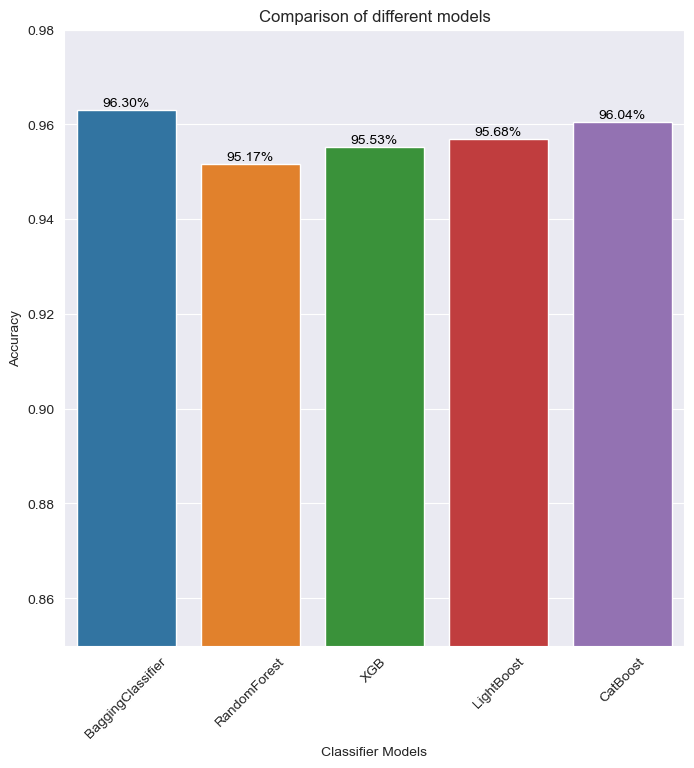

In [310]:
plt.figure(figsize=(8,8))
sns.set_style('darkgrid')
ax = sns.barplot(x=accuracy_data['Algorithm'], y=accuracy_data['Accuracy'])

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')
plt.xticks(rotation=45)
plt.ylim(.85,.98)
plt.show()

# confusion matrix for all Algorithm

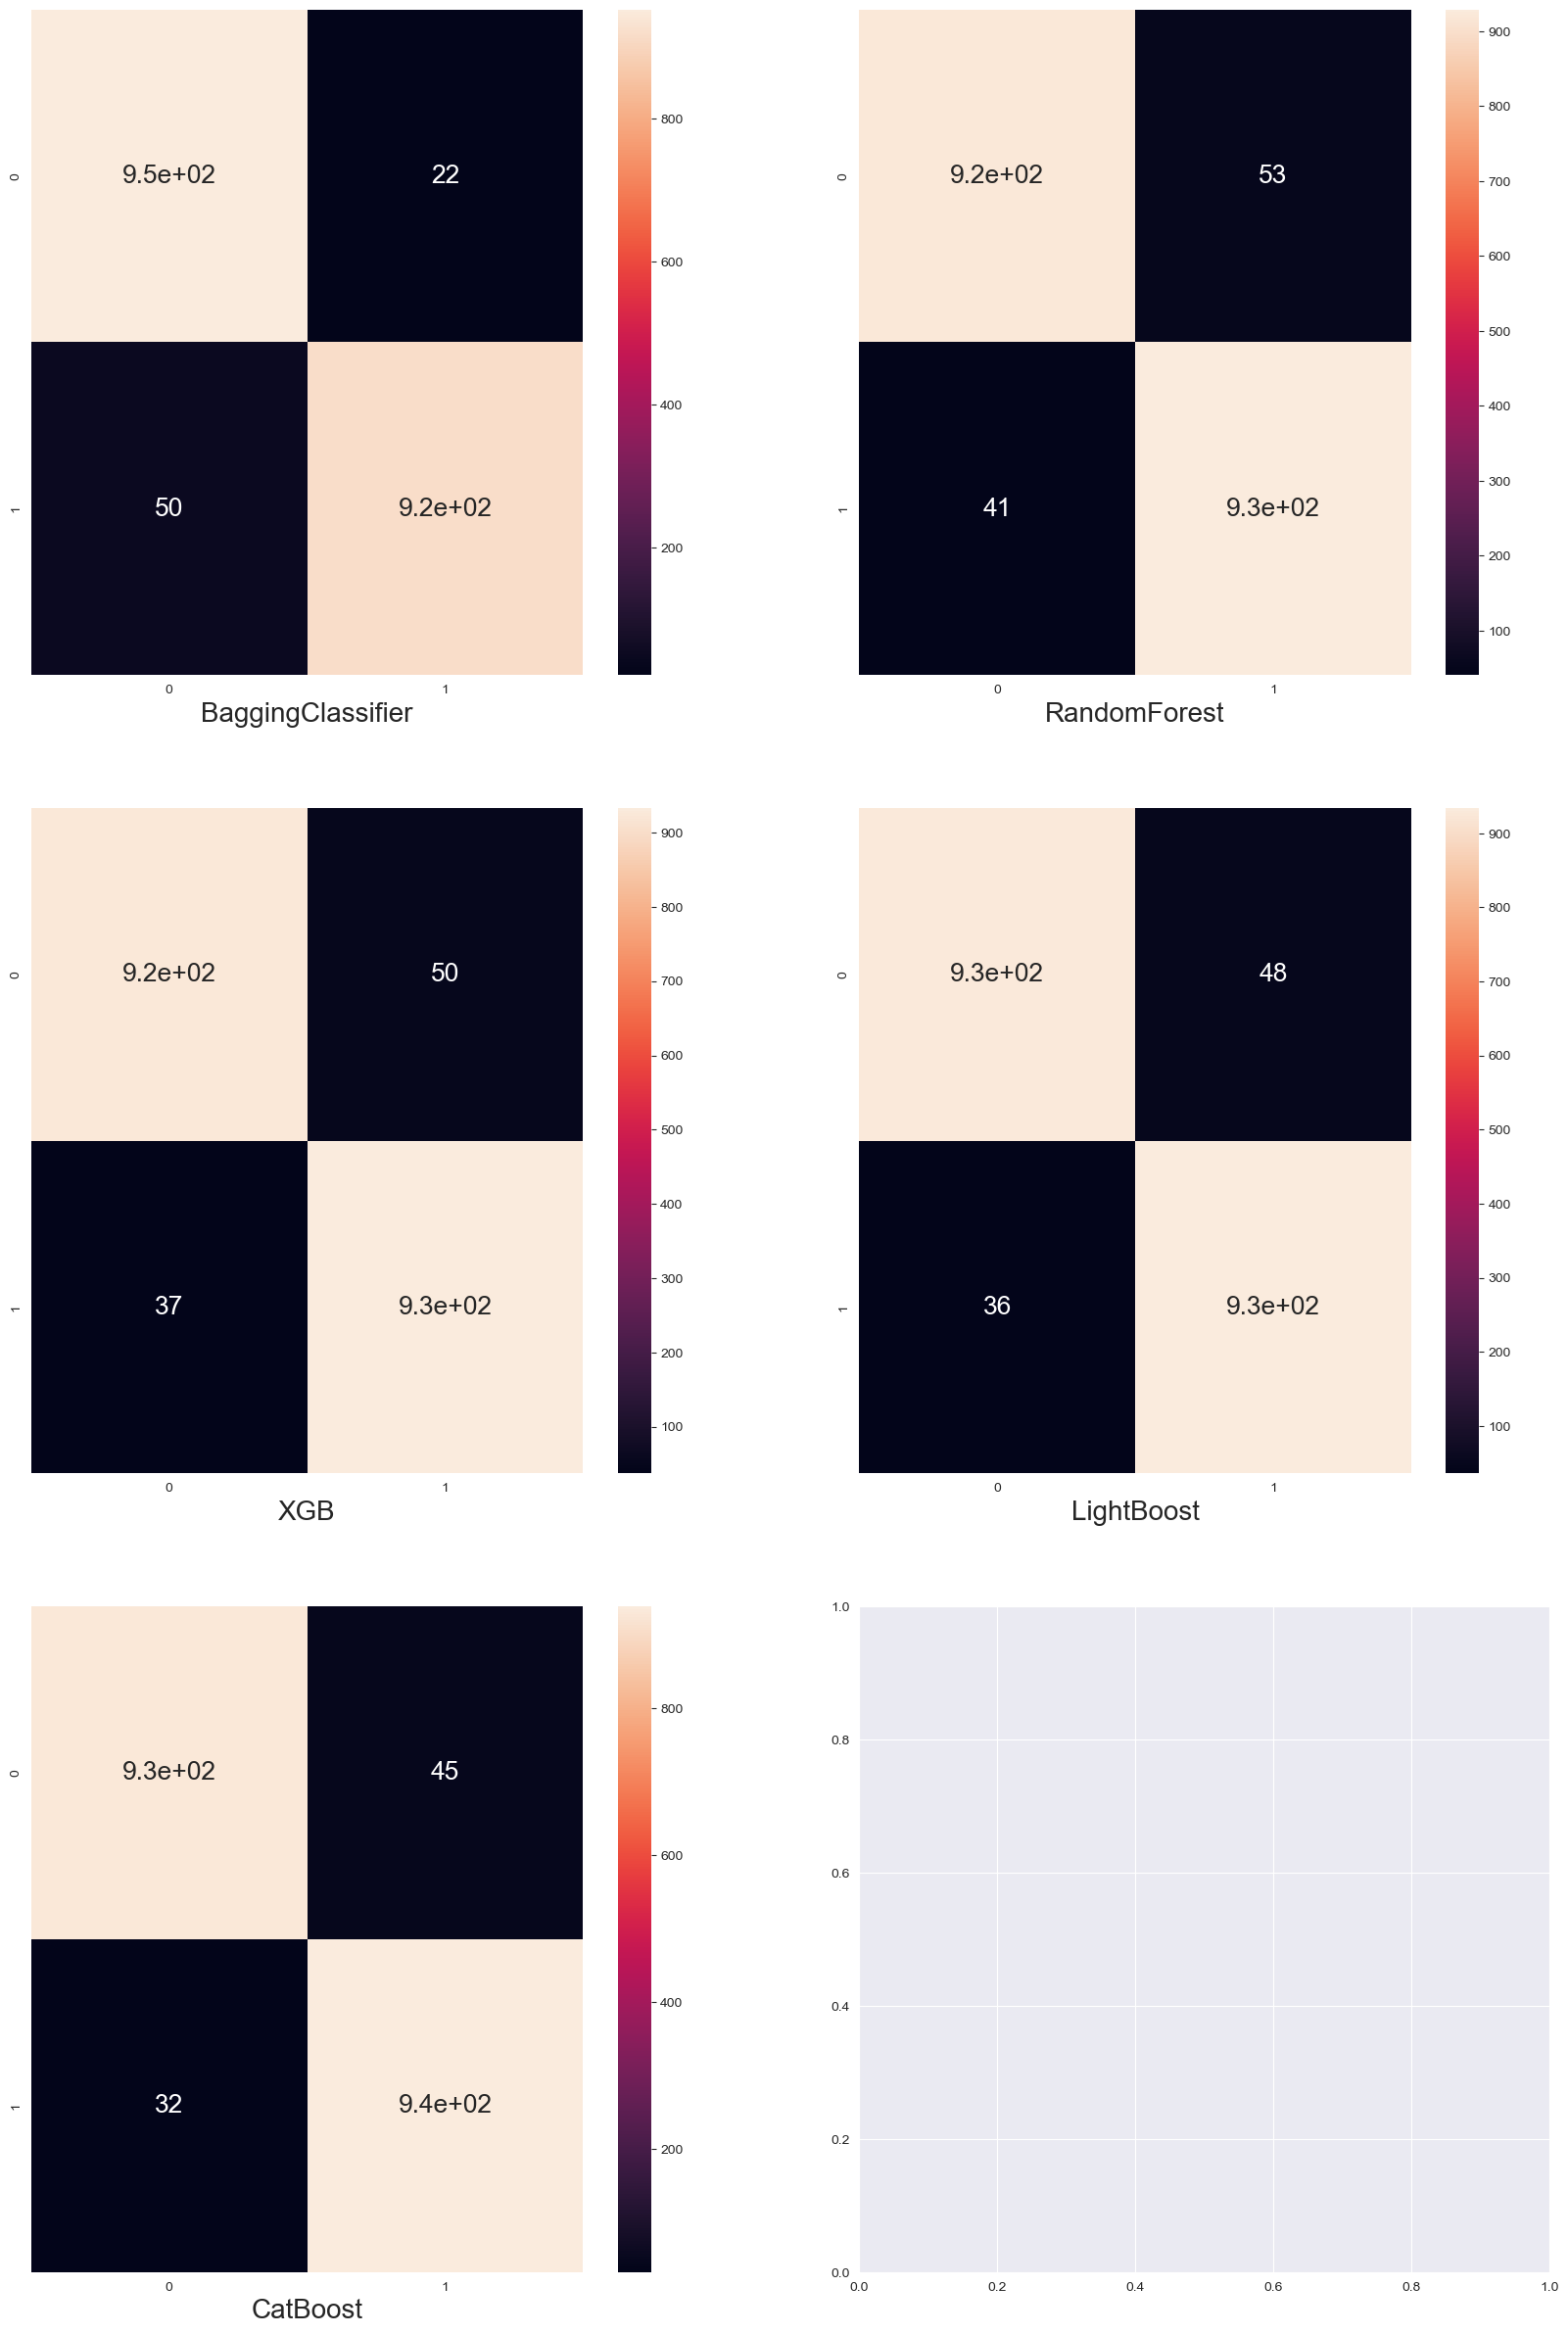

In [313]:
fig,ax= plt.subplots(3,2,figsize=(20,30))
for i in range(accuracy_data.shape[0]):
    row,col=i//2,i%2
    sns.heatmap(confusion_matrix(y_test,algo[i].predict(x_test)),annot=True,annot_kws={"fontsize": 19}
                ,ax=ax[row,col])
    ax[row,col].set_xlabel(model_name[i],fontsize=20)

In [314]:
import pickle
pickle.dump(cat_,open('heart_stroke.pkl','wb'))